# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [5]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud


import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [6]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [7]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [8]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.1 Sorted by time

In [9]:
#https://stats.stackexchange.com/questions/341312/train-test-split-with-time-and-person-indexed-data
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1

## 1.2 Adding resource data in dataframe

In [10]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [11]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [12]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades PreK-2   
1           UT 2016-04-27 00:31:25             Grades 3-5   

  project_subject_categories            project_subject_subcategories  \
0             Math & Science  Applied Sciences, Health & Life Science   
1              Special Needs                            Special Needs   

                                  project_title  \
0  Engineering STEAM into the Primary Classroom   
1                       Sensory Tools for Focus   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                            53                    1  725.05   
1                                             4                    1  213.03   

   quantity  
0         4  
1         8

In [13]:
print(project_data["project_is_approved"].value_counts(normalize = True))

1    0.848583
0    0.151417
Name: project_is_approved, dtype: float64


Very high imbalance dataset so require to be balanced.

## project_grade_category cleaning

In [14]:
project_grade_category = []

for i in range(len(project_data)):
    a = project_data["project_grade_category"][i].replace(" ", "_")
    project_grade_category.append(a)

In [15]:
project_grade_category[0:5]

['Grades_PreK-2', 'Grades_3-5', 'Grades_PreK-2', 'Grades_PreK-2', 'Grades_3-5']

In [16]:
project_data.drop(['project_grade_category'], axis=1, inplace=True)
project_data["project_grade_category"] = project_grade_category

In [17]:
project_data["project_grade_category"].value_counts()

Grades_PreK-2    44225
Grades_3-5       37137
Grades_6-8       16923
Grades_9-12      10963
Name: project_grade_category, dtype: int64

In [18]:
project_data = project_data.sample(n=60000) 
#project_data=project_data.tail(10000)
project_data.shape

(60000, 19)

## 1.3 preprocessing of `project_subject_categories`

In [19]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.4 preprocessing of `project_subject_subcategories`

In [20]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

In [21]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'project_grade_category', 'clean_categories',
       'clean_subcategories'],
      dtype='object')

## 1.3 Text preprocessing

In [22]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [23]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
18116      132391  p241019  579abcbe1f6ceb09eb2968ae68ff740e            Mr.   
16490      114742  p108441  686ec5acb9594539fad80f58d17f51f1            Ms.   

      school_state                Date  \
18116           CA 2016-07-26 15:02:00   
16490           TN 2016-07-20 23:55:31   

                                     project_title  \
18116                               Ready Set Read   
16490  Document Camera for 8th Grade English Class   

                                         project_essay_1  \
18116  My students come from a poverty stricken agric...   
16490  Our students are unlike those at other schools...   

                                         project_essay_2 project_essay_3  \
18116  My students and I are very grateful for sponso...             NaN   
16490  Document cameras can be used several ways in t...             NaN   

      project_essay_4                           project_resource_summary  \
18116             NaN  My students need a bookshelf, book pockets, an...   
16490             NaN  My students need a document camera so they can...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
18116                                            17                    1   
16490                                             2                    1   

        price  quantity project_grade_category   clean_categories  \
18116  236.73         5             Grades_3-5  Literacy_Language   
16490  172.28         4             Grades_6-8  Literacy_Language   

      clean_subcategories                                              essay  
18116            Literacy  My students come from a poverty stricken agric...  
16490            Literacy  Our students are unlike those at other schools...

In [24]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [25]:
'''# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)'''

'# printing some random reviews\nprint(project_data[\'essay\'].values[0])\nprint("="*50)\nprint(project_data[\'essay\'].values[150])\nprint("="*50)\nprint(project_data[\'essay\'].values[1000])\nprint("="*50)\nprint(project_data[\'essay\'].values[20000])\nprint("="*50)\nprint(project_data[\'essay\'].values[99999])\nprint("="*50)'

In [26]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [27]:
'''sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)'''

'sent = decontracted(project_data[\'essay\'].values[20000])\nprint(sent)\nprint("="*50)'

In [28]:
'''# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)'''

'# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/\nsent = sent.replace(\'\\r\', \' \')\nsent = sent.replace(\'\\"\', \' \')\nsent = sent.replace(\'\\n\', \' \')\nprint(sent)'

In [29]:
'''#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)'''

"#remove spacial character: https://stackoverflow.com/a/5843547/4084039\nsent = re.sub('[^A-Za-z0-9]+', ' ', sent)\nprint(sent)"

In [30]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

### 1.3.1Preprocess of Preprocessing of `essay`

In [31]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████████████████████████████| 60000/60000 [00:35<00:00, 1707.07it/s]


In [32]:
# after preprocesing
#preprocessed_essays[10:]

In [33]:
project_data['preprocessed_essays'] = preprocessed_essays
project_data.drop(['essay'], axis=1, inplace=True)

### <h2><font color='red'> 1.3.2Preprocessing of `project_title`</font></h2>

In [34]:
# similarly you can preprocess the titles also

In [35]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_title.append(sent.lower().strip())

100%|█████████████████████████████████| 60000/60000 [00:01<00:00, 38093.06it/s]


In [36]:
# after preprocesing
#preprocessed_project_title[1000]

In [37]:
#https://stackoverflow.com/questions/26666919/add-column-in-dataframe-from-list/38490727
project_data['preprocessed_project_title'] = preprocessed_project_title
project_data.drop(['project_title'], axis=1, inplace=True)

In [38]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
18116      132391  p241019  579abcbe1f6ceb09eb2968ae68ff740e            Mr.   
16490      114742  p108441  686ec5acb9594539fad80f58d17f51f1            Ms.   

      school_state                Date  \
18116           CA 2016-07-26 15:02:00   
16490           TN 2016-07-20 23:55:31   

                                         project_essay_1  \
18116  My students come from a poverty stricken agric...   
16490  Our students are unlike those at other schools...   

                                         project_essay_2 project_essay_3  \
18116  My students and I are very grateful for sponso...             NaN   
16490  Document cameras can be used several ways in t...             NaN   

      project_essay_4                           project_resource_summary  \
18116             NaN  My students need a bookshelf, book pockets, an...   
16490             NaN  My students need a document camera so they can...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
18116                                            17                    1   
16490                                             2                    1   

        price  quantity project_grade_category   clean_categories  \
18116  236.73         5             Grades_3-5  Literacy_Language   
16490  172.28         4             Grades_6-8  Literacy_Language   

      clean_subcategories                                preprocessed_essays  \
18116            Literacy  my students come poverty stricken agricultural...   
16490            Literacy  our students unlike schools our students kicke...   

                    preprocessed_project_title  
18116                           ready set read  
16490  document camera 8th grade english class

In [39]:
project_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 18116 to 20605
Data columns (total 20 columns):
Unnamed: 0                                      60000 non-null int64
id                                              60000 non-null object
teacher_id                                      60000 non-null object
teacher_prefix                                  59999 non-null object
school_state                                    60000 non-null object
Date                                            60000 non-null datetime64[ns]
project_essay_1                                 60000 non-null object
project_essay_2                                 60000 non-null object
project_essay_3                                 2101 non-null object
project_essay_4                                 2101 non-null object
project_resource_summary                        60000 non-null object
teacher_number_of_previously_posted_projects    60000 non-null int64
project_is_approved                        

## total number of word in each title and essay,




In [40]:
#https://stackoverflow.com/questions/49984905/count-number-of-words-per-row
project_data['totalwords_title'] = project_data['preprocessed_project_title'].str.split().str.len()

project_data['totalwords_essay'] = project_data['preprocessed_essays'].str.split().str.len()
project_data['totalwords_essay']

18116     249
16490     205
39049     172
65876     121
549       161
92556     131
40917     290
3145      185
50194     110
29798     112
89449     175
21561     206
10053     112
63403     112
89599     223
2211       80
38907     134
62748     118
5706      136
48761     129
36968     130
13886     144
10933     146
60799     183
80798     106
32802     130
98030     140
73499     239
41134     212
92458     132
         ... 
67194     173
8174      200
65962     219
56868     170
52334     118
41562     119
72595     198
95623     112
59973     234
107357    179
12437     128
75112     140
108784    247
54568     119
9579      174
89851     164
102935    122
71675     209
90502     130
25364      99
8232      138
4329      229
91489     215
37319     124
93802     155
17230     127
97895     117
2544      257
94142     171
20605     146
Name: totalwords_essay, Length: 60000, dtype: int64

No need of normilization or standarization in case of decision tree method

## Sentiment  feature of title and essay 

In [41]:
!pip install vaderSentiment

In [42]:
'''#sentiment analysis of project_title
#_____________________________________________
#https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f

from nltk.sentiment.vader import SentimentIntensityAnalyzer

import nltk
#nltk.download('vader_lexicon')
catogories = list(project_data['preprocessed_project_title'].values)
sentiment_positive=[]
sentiment_negative=[]
sentiment_neutral=[]
sentiment_compound=[]
#cat_list = []
for i in catogories:
  sid = SentimentIntensityAnalyzer()
  sentiment_val=sid.polarity_scores(i)
  #cat_list.append(sentiment_val)
  sentiment_positive.append(sentiment_val['pos'])
  sentiment_negative.append(sentiment_val['neg'])
  sentiment_neutral.append(sentiment_val['neu'])
  sentiment_compound.append(sentiment_val['compound'])
    
#project_data['sentiment_pos_value'] = cat_list
project_data['sentiment_pos_title']=sentiment_positive
project_data['sentiment_neg_title']=sentiment_negative
project_data['sentiment_neu_title']=sentiment_neutral
project_data['sentiment_compound_title']=sentiment_compound'''

"#sentiment analysis of project_title\n#_____________________________________________\n#https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f\n\nfrom nltk.sentiment.vader import SentimentIntensityAnalyzer\n\nimport nltk\n#nltk.download('vader_lexicon')\ncatogories = list(project_data['preprocessed_project_title'].values)\nsentiment_positive=[]\nsentiment_negative=[]\nsentiment_neutral=[]\nsentiment_compound=[]\n#cat_list = []\nfor i in catogories:\n  sid = SentimentIntensityAnalyzer()\n  sentiment_val=sid.polarity_scores(i)\n  #cat_list.append(sentiment_val)\n  sentiment_positive.append(sentiment_val['pos'])\n  sentiment_negative.append(sentiment_val['neg'])\n  sentiment_neutral.append(sentiment_val['neu'])\n  sentiment_compound.append(sentiment_val['compound'])\n    \n#project_data['sentiment_pos_value'] = cat_list\nproject_data['sentiment_pos_title']=sentiment_positive\nproject_data['sentiment_neg_title']=sentiment_negative

### Sentiment feature of title

In [43]:
#sentiment analysis of essay
#_____________________________________________
#https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f

from nltk.sentiment.vader import SentimentIntensityAnalyzer

import nltk
#nltk.download('vader_lexicon')
catogories = list(project_data['preprocessed_project_title'].values)
sentiment_positive=[]
sentiment_negative=[]
sentiment_neutral=[]
sentiment_compound=[]
#cat_list = []
for i in catogories:
  sid = SentimentIntensityAnalyzer()
  sentiment_val=sid.polarity_scores(i)
  #cat_list.append(sentiment_val)
  sentiment_positive.append(sentiment_val['pos'])
  sentiment_negative.append(sentiment_val['neg'])
  sentiment_neutral.append(sentiment_val['neu'])
  sentiment_compound.append(sentiment_val['compound'])
    
#project_data['sentiment_pos_value'] = cat_list
project_data['sentiment_pos_title']=sentiment_positive
project_data['sentiment_neg_title']=sentiment_negative
project_data['sentiment_neu_title']=sentiment_neutral
project_data['sentiment_compound_title']=sentiment_compound

In [44]:
'''sentiment_pos_title=project_data['sentiment_pos_title'].values.reshape(-1,1)
sentiment_neg_title=project_data['sentiment_neg_title'].values.reshape(-1,1)
sentiment_neu_title=project_data['sentiment_neu_title'].values.reshape(-1,1)
sentiment_compound_title=project_data['sentiment_compound_title'].values.reshape(-1,1)
type(sentiment_pos_title)'''

"sentiment_pos_title=project_data['sentiment_pos_title'].values.reshape(-1,1)\nsentiment_neg_title=project_data['sentiment_neg_title'].values.reshape(-1,1)\nsentiment_neu_title=project_data['sentiment_neu_title'].values.reshape(-1,1)\nsentiment_compound_title=project_data['sentiment_compound_title'].values.reshape(-1,1)\ntype(sentiment_pos_title)"

### Sentiment feature of essay

In [45]:
#sentiment analysis of essay
#_____________________________________________
#https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f

from nltk.sentiment.vader import SentimentIntensityAnalyzer

import nltk
#nltk.download('vader_lexicon')
catogories = list(project_data['preprocessed_essays'].values)
sentiment_positive=[]
sentiment_negative=[]
sentiment_neutral=[]
sentiment_compound=[]
#cat_list = []
for i in catogories:
  sid = SentimentIntensityAnalyzer()
  sentiment_val=sid.polarity_scores(i)
  #cat_list.append(sentiment_val)
  sentiment_positive.append(sentiment_val['pos'])
  sentiment_negative.append(sentiment_val['neg'])
  sentiment_neutral.append(sentiment_val['neu'])
  sentiment_compound.append(sentiment_val['compound'])
    
#project_data['sentiment_pos_value'] = cat_list
project_data['sentiment_pos_essay']=sentiment_positive
project_data['sentiment_neg_essay']=sentiment_negative
project_data['sentiment_neu_essay']=sentiment_neutral
project_data['sentiment_compound_essay']=sentiment_compound

In [46]:
'''sentiment_pos_essay=project_data['sentiment_pos_essay'].values.reshape(-1,1)
sentiment_neg_essay=project_data['sentiment_neg_essay'].values.reshape(-1,1)
sentiment_neu_essay=project_data['sentiment_neu_essay'].values.reshape(-1,1)
sentiment_compound_essay=project_data['sentiment_compound_essay'].values.reshape(-1,1)
sentiment_pos_essay.shape'''

"sentiment_pos_essay=project_data['sentiment_pos_essay'].values.reshape(-1,1)\nsentiment_neg_essay=project_data['sentiment_neg_essay'].values.reshape(-1,1)\nsentiment_neu_essay=project_data['sentiment_neu_essay'].values.reshape(-1,1)\nsentiment_compound_essay=project_data['sentiment_compound_essay'].values.reshape(-1,1)\nsentiment_pos_essay.shape"

## spliting data into train test and cv(to avoid data leak, spliting done before probability base encoding of categorical variable)

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from collections import Counter
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [48]:
project_data1=project_data

In [49]:
#to check null column
#_____________________________________
print("is there any null value in teacher prefix dataset?", project_data['teacher_prefix'].isnull().any())
print("_"*50)
count_nan = len(project_data['teacher_prefix']) - project_data['teacher_prefix'].count()
print("number of row have null value", count_nan)

print("_"*50)

print("total number of row have null value", project_data['teacher_prefix'].isnull().sum())

is there any null value in teacher prefix dataset? True
__________________________________________________
number of row have null value 1
__________________________________________________
total number of row have null value 1


In [50]:
#https://stackoverflow.com/questions/54557423/series-object-has-no-attribute-values-counts
#https://stackoverflow.com/questions/26047209/what-is-the-difference-between-a-pandas-series-and-a-single-column-dataframe

y_project_data=project_data[project_data['teacher_prefix'].notnull()]
y_project_data.shape

(59999, 30)

In [51]:
y=y_project_data['project_is_approved']
y.shape

(59999,)

In [52]:
#https://stackoverflow.com/questions/42224700/attributeerror-float-object-has-no-attribute-split

#removing null row from teacher prefix column dataset
project_data = project_data[project_data['teacher_prefix'].notnull()]
project_data.shape

(59999, 30)

In [53]:
#https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe/55608360

print("is there any null value in teacher prefix dataset?", project_data['teacher_prefix'].isnull().any())
print("_"*50)
count_nan = len(project_data['teacher_prefix']) - project_data['teacher_prefix'].count()
print("number of row have null value", count_nan)

print("_"*50)

print("total number of row have null value", project_data['teacher_prefix'].isnull().sum())

is there any null value in teacher prefix dataset? False
__________________________________________________
number of row have null value 0
__________________________________________________
total number of row have null value 0


**Observation**:  very few row have hull value of large dataset so better remove the null row

In [54]:
#series value count
project_data['teacher_prefix'].value_counts()

Mrs.       31358
Ms.        21383
Mr.         5924
Teacher     1325
Dr.            9
Name: teacher_prefix, dtype: int64

In [55]:
'''#removing null row from teacher prefix column dataset
df_new['teacher_prefix'] = df_new['teacher_prefix'][df_new['teacher_prefix'].notnull()]'''

"#removing null row from teacher prefix column dataset\ndf_new['teacher_prefix'] = df_new['teacher_prefix'][df_new['teacher_prefix'].notnull()]"

In [56]:
'''#replace NAN to space https ://stackoverflow.com/questions/49259305/raise-valueerrornp-nan-is-an-invalid-document-expected-byte-or?rq=1
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna(' ')'''

"#replace NAN to space https ://stackoverflow.com/questions/49259305/raise-valueerrornp-nan-is-an-invalid-document-expected-byte-or?rq=1\nproject_data['teacher_prefix'] = project_data['teacher_prefix'].fillna(' ')"

In [57]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
#split the data into train and test fo bag of words

x_train,x_test,y_train,y_test=model_selection.train_test_split(project_data,y,test_size=0.3,random_state=0)
#split train into cross val train and cross val test
#x_train,x_cv,y_train,y_cv=model_selection.train_test_split(x_t,y_t,test_size=0.3,random_state=0)

In [58]:
project_data.shape

(59999, 30)

## encoding categorical features

In [59]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'project_grade_category', 'clean_categories',
       'clean_subcategories', 'preprocessed_essays',
       'preprocessed_project_title', 'totalwords_title', 'totalwords_essay',
       'sentiment_pos_title', 'sentiment_neg_title', 'sentiment_neu_title',
       'sentiment_compound_title', 'sentiment_pos_essay',
       'sentiment_neg_essay', 'sentiment_neu_essay',
       'sentiment_compound_essay'],
      dtype='object')

In [60]:
x_train.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'project_grade_category', 'clean_categories',
       'clean_subcategories', 'preprocessed_essays',
       'preprocessed_project_title', 'totalwords_title', 'totalwords_essay',
       'sentiment_pos_title', 'sentiment_neg_title', 'sentiment_neu_title',
       'sentiment_compound_title', 'sentiment_pos_essay',
       'sentiment_neg_essay', 'sentiment_neu_essay',
       'sentiment_compound_essay'],
      dtype='object')

In [61]:
x_train_approved = x_train.loc[x_train['project_is_approved'] == 1]
x_train_reject = x_train.loc[x_train['project_is_approved'] == 0]



x_test_approved = x_test.loc[x_test['project_is_approved'] == 1]
x_test_reject = x_test.loc[x_test['project_is_approved'] == 0]





### clean category 

#### clean category x_train

In [62]:
#step1: Find counts of each
#__________________________________________
x_train_clean_category_approved = {}
x_train_clean_category_reject = {}
x_train_clean_category_total = {}

for a in x_train_approved['clean_categories'] :
    for b in a.split():
        if b not in x_train_clean_category_approved :
            x_train_clean_category_approved[b] = 1
        else :
            x_train_clean_category_approved[b] += 1
      

for a in x_train_reject['clean_categories'] :
    for b in a.split():
        if b not in x_train_clean_category_reject :
            x_train_clean_category_reject[b] = 1
        else :
            x_train_clean_category_reject[b] += 1

for a in x_train['clean_categories'] :
    for b in a.split():
        if b not in x_train_clean_category_total :
            x_train_clean_category_total[b] = 1
        else :
            x_train_clean_category_total[b] += 1            
            
            
print(x_train_clean_category_approved)
print(x_train_clean_category_reject)
print(x_train_clean_category_total)

{'Health_Sports': 4661, 'Math_Science': 13429, 'Literacy_Language': 17293, 'Music_Arts': 3373, 'History_Civics': 1977, 'SpecialNeeds': 4309, 'AppliedLearning': 3819, 'Warmth': 466, 'Care_Hunger': 466}
{'Literacy_Language': 2689, 'Math_Science': 2484, 'Health_Sports': 819, 'Music_Arts': 637, 'AppliedLearning': 806, 'History_Civics': 329, 'SpecialNeeds': 876, 'Warmth': 51, 'Care_Hunger': 51}
{'Health_Sports': 5480, 'Math_Science': 15913, 'Literacy_Language': 19982, 'Music_Arts': 4010, 'History_Civics': 2306, 'SpecialNeeds': 5185, 'AppliedLearning': 4625, 'Warmth': 517, 'Care_Hunger': 517}


In [63]:
#step2: Find Probabilities with respect to classes
#___________________________________________________

x_train_approved_prob_clean_category = {}
x_train_reject_prob_clean_category = {}

for st in x_train_clean_category_total.keys():
  x_train_approved_prob_clean_category[st] = (x_train_clean_category_approved[st])/float(x_train_clean_category_total[st])
    

for stt in x_train_clean_category_total.keys():
  x_train_reject_prob_clean_category[stt] = (x_train_clean_category_reject[stt])/float(x_train_clean_category_total[stt])

In [64]:
#Step 3 : Apply probabilities to x_train_clean_category
#______________________________________________
x_train_reject_clean_category = []
x_train_approved_clean_category = []

for a in x_train["clean_categories"] :
    b = a.split()
    if len(b) == 1 :
        x_train_reject_clean_category.append(x_train_reject_prob_clean_category[a])
        x_train_approved_clean_category.append(x_train_approved_prob_clean_category[a])
    else :
        c = x_train_reject_prob_clean_category[b[0]]
        d = x_train_reject_prob_clean_category[b[1]]
        e = x_train_approved_prob_clean_category[b[0]]
        f = x_train_approved_prob_clean_category[b[1]]
        
        x_train_reject_clean_category.append(c*d)
        x_train_approved_clean_category.append(e*f)

In [65]:
x_train['x_train_reject_clean_category']=x_train_reject_clean_category
x_train['x_train_approved_clean_category']=x_train_approved_clean_category

In [66]:
#normalize
#------------------------------------
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_train["x_train_reject_clean_category"].values.reshape(-1,1))
x_train_reject_clean_category_nor = normalizer.transform(x_train["x_train_reject_clean_category"].values.reshape(-1,1))

In [67]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_train["x_train_approved_clean_category"].values.reshape(-1,1))
x_train_approved_clean_category_nor = normalizer.transform(x_train["x_train_approved_clean_category"].values.reshape(-1,1))

####clean category x_test

In [68]:
#step1: Find counts of each
#__________________________________________
x_test_clean_category_approved = {}
x_test_clean_category_reject = {}
x_test_clean_category_total = {}

for a in x_test_approved['clean_categories'] :
    for b in a.split():
        if b not in x_test_clean_category_approved :
            x_test_clean_category_approved[b] = 1
        else :
            x_test_clean_category_approved[b] += 1
      

for a in x_test_reject['clean_categories'] :
    for b in a.split():
        if b not in x_test_clean_category_reject :
            x_test_clean_category_reject[b] = 1
        else :
            x_test_clean_category_reject[b] += 1

for a in x_test['clean_categories'] :
    for b in a.split():
        if b not in x_test_clean_category_total :
            x_test_clean_category_total[b] = 1
        else :
            x_test_clean_category_total[b] += 1            
            
            
print(x_test_clean_category_approved)
print(x_test_clean_category_reject)
print(x_test_clean_category_total)

{'Math_Science': 5703, 'Literacy_Language': 7493, 'Warmth': 251, 'Care_Hunger': 251, 'Health_Sports': 1944, 'SpecialNeeds': 1921, 'Music_Arts': 1418, 'AppliedLearning': 1672, 'History_Civics': 805}
{'Literacy_Language': 1158, 'Music_Arts': 287, 'Health_Sports': 366, 'Math_Science': 1072, 'SpecialNeeds': 345, 'AppliedLearning': 355, 'History_Civics': 136, 'Warmth': 20, 'Care_Hunger': 20}
{'Math_Science': 6775, 'Literacy_Language': 8651, 'Warmth': 271, 'Care_Hunger': 271, 'Health_Sports': 2310, 'Music_Arts': 1705, 'SpecialNeeds': 2266, 'AppliedLearning': 2027, 'History_Civics': 941}


In [69]:
#step2: Find Probabilities with respect to classes
#___________________________________________________

x_test_approved_prob_clean_category = {}
x_test_reject_prob_clean_category = {}

for st in x_test_clean_category_total.keys():
  x_test_approved_prob_clean_category[st] = (x_test_clean_category_approved[st])/float(x_test_clean_category_total[st])
    

for stt in x_test_clean_category_total.keys():
  x_test_reject_prob_clean_category[stt] = (x_test_clean_category_reject[stt])/float(x_test_clean_category_total[stt])

In [70]:
#Step 3 : Apply probabilities to x_test_clean_category
#______________________________________________
x_test_reject_clean_category = []
x_test_approved_clean_category = []

for a in x_test["clean_categories"] :
    b = a.split()
    if len(b) == 1 :
        x_test_reject_clean_category.append(x_test_reject_prob_clean_category[a])
        x_test_approved_clean_category.append(x_test_approved_prob_clean_category[a])
    else :
        c = x_test_reject_prob_clean_category[b[0]]
        d = x_test_reject_prob_clean_category[b[1]]
        e = x_test_approved_prob_clean_category[b[0]]
        f = x_test_approved_prob_clean_category[b[1]]
        
        x_test_reject_clean_category.append(c*d)
        x_test_approved_clean_category.append(e*f)

In [71]:
x_test['x_test_reject_clean_category']=x_test_reject_clean_category
x_test['x_test_approved_clean_category']=x_test_approved_clean_category

In [72]:
#normalize
#------------------------------------
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_test["x_test_reject_clean_category"].values.reshape(-1,1))
x_test_reject_clean_category_nor = normalizer.transform(x_test["x_test_reject_clean_category"].values.reshape(-1,1))

In [73]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_test["x_test_approved_clean_category"].values.reshape(-1,1))
x_test_approved_clean_category_nor = normalizer.transform(x_test["x_test_approved_clean_category"].values.reshape(-1,1))

### clean_subcategories

####clean subcategory x_train

In [74]:
#step1: Find counts of each
#__________________________________________
x_train_clean_subcategory_approved = {}
x_train_clean_subcategory_reject = {}
x_train_clean_subcategory_total = {}

for a in x_train_approved['clean_subcategories'] :
    for b in a.split():
        if b not in x_train_clean_subcategory_approved :
            x_train_clean_subcategory_approved[b] = 1
        else :
            x_train_clean_subcategory_approved[b] += 1
      

for a in x_train_reject['clean_subcategories'] :
    for b in a.split():
        if b not in x_train_clean_subcategory_reject :
            x_train_clean_subcategory_reject[b] = 1
        else :
            x_train_clean_subcategory_reject[b] += 1

for a in x_train['clean_subcategories'] :
    for b in a.split():
        if b not in x_train_clean_subcategory_total :
            x_train_clean_subcategory_total[b] = 1
        else :
            x_train_clean_subcategory_total[b] += 1            
            
            
print(x_train_clean_subcategory_approved)
print(x_train_clean_subcategory_reject)
print(x_train_clean_subcategory_total)

{'Gym_Fitness': 1494, 'Mathematics': 9164, 'EnvironmentalScience': 1738, 'Literacy': 11362, 'Literature_Writing': 7220, 'PerformingArts': 690, 'History_Geography': 1055, 'Music': 1081, 'SpecialNeeds': 4309, 'AppliedSciences': 3509, 'ESL': 1363, 'EarlyDevelopment': 1336, 'VisualArts': 1969, 'Health_LifeScience': 1342, 'Health_Wellness': 3372, 'SocialSciences': 643, 'Extracurricular': 250, 'Economics': 84, 'Warmth': 466, 'Care_Hunger': 466, 'College_CareerPrep': 839, 'TeamSports': 712, 'ParentInvolvement': 224, 'CharacterEducation': 645, 'NutritionEducation': 432, 'Other': 717, 'CommunityService': 139, 'ForeignLanguages': 256, 'FinancialLiteracy': 194, 'Civics_Government': 272}
{'Literacy': 1640, 'Mathematics': 1627, 'Health_Wellness': 522, 'Health_LifeScience': 282, 'VisualArts': 442, 'CommunityService': 40, 'EnvironmentalScience': 381, 'History_Geography': 161, 'Literature_Writing': 1217, 'SpecialNeeds': 876, 'EarlyDevelopment': 279, 'Music': 143, 'PerformingArts': 108, 'SocialSciences

In [75]:
#step2: Find Probabilities with respect to classes
#___________________________________________________

x_train_approved_prob_clean_subcategory = {}
x_train_reject_prob_clean_subcategory = {}

for st in x_train_clean_subcategory_total.keys():
  x_train_approved_prob_clean_subcategory[st] = (x_train_clean_subcategory_approved[st])/float(x_train_clean_subcategory_total[st])
    

for stt in x_train_clean_subcategory_total.keys():
  x_train_reject_prob_clean_subcategory[stt] = (x_train_clean_subcategory_reject[stt])/float(x_train_clean_subcategory_total[stt])

In [76]:
#Step 3 : Apply probabilities to x_train_clean_subcategory
#______________________________________________
x_train_reject_clean_subcategory = []
x_train_approved_clean_subcategory = []

for a in x_train["clean_subcategories"] :
    b = a.split()
    if len(b) == 1 :
        x_train_reject_clean_subcategory.append(x_train_reject_prob_clean_subcategory[a])
        x_train_approved_clean_subcategory.append(x_train_approved_prob_clean_subcategory[a])
    else :
        c = x_train_reject_prob_clean_subcategory[b[0]]
        d = x_train_reject_prob_clean_subcategory[b[1]]
        e = x_train_approved_prob_clean_subcategory[b[0]]
        f = x_train_approved_prob_clean_subcategory[b[1]]
        
        x_train_reject_clean_subcategory.append(c*d)
        x_train_approved_clean_subcategory.append(e*f)

In [77]:
x_train['x_train_reject_clean_subcategory']=x_train_reject_clean_subcategory
x_train['x_train_approved_clean_subcategory']=x_train_approved_clean_subcategory

In [78]:
#normalize
#------------------------------------
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_train["x_train_reject_clean_subcategory"].values.reshape(-1,1))
x_train_reject_clean_subcategory_nor = normalizer.transform(x_train["x_train_reject_clean_subcategory"].values.reshape(-1,1))

In [79]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_train["x_train_approved_clean_subcategory"].values.reshape(-1,1))
x_train_approved_clean_subcategory_nor = normalizer.transform(x_train["x_train_approved_clean_subcategory"].values.reshape(-1,1))

####clean subsubcategory x_test

In [80]:
#step1: Find counts of each
#__________________________________________
x_test_clean_subcategory_approved = {}
x_test_clean_subcategory_reject = {}
x_test_clean_subcategory_total = {}

for a in x_test_approved['clean_subcategories'] :
    for b in a.split():
        if b not in x_test_clean_subcategory_approved :
            x_test_clean_subcategory_approved[b] = 1
        else :
            x_test_clean_subcategory_approved[b] += 1
      

for a in x_test_reject['clean_subcategories'] :
    for b in a.split():
        if b not in x_test_clean_subcategory_reject :
            x_test_clean_subcategory_reject[b] = 1
        else :
            x_test_clean_subcategory_reject[b] += 1

for a in x_test['clean_subcategories'] :
    for b in a.split():
        if b not in x_test_clean_subcategory_total :
            x_test_clean_subcategory_total[b] = 1
        else :
            x_test_clean_subcategory_total[b] += 1            
            
            
print(x_test_clean_subcategory_approved)
print(x_test_clean_subcategory_reject)
print(x_test_clean_subcategory_total)

{'EnvironmentalScience': 738, 'Literacy': 4811, 'Warmth': 251, 'Care_Hunger': 251, 'Literature_Writing': 3194, 'Health_Wellness': 1448, 'AppliedSciences': 1530, 'Mathematics': 3882, 'ESL': 628, 'SpecialNeeds': 1921, 'Music': 448, 'PerformingArts': 257, 'VisualArts': 855, 'Other': 328, 'CharacterEducation': 283, 'Gym_Fitness': 608, 'Extracurricular': 111, 'Health_LifeScience': 559, 'SocialSciences': 258, 'EarlyDevelopment': 593, 'Civics_Government': 94, 'History_Geography': 450, 'FinancialLiteracy': 71, 'College_CareerPrep': 340, 'NutritionEducation': 168, 'ParentInvolvement': 91, 'TeamSports': 278, 'CommunityService': 61, 'Economics': 42, 'ForeignLanguages': 122}
{'Literature_Writing': 517, 'VisualArts': 191, 'Gym_Fitness': 116, 'TeamSports': 68, 'Literacy': 725, 'EnvironmentalScience': 151, 'AppliedSciences': 312, 'Mathematics': 706, 'ESL': 105, 'SpecialNeeds': 345, 'Other': 74, 'Civics_Government': 27, 'ParentInvolvement': 14, 'History_Geography': 73, 'EarlyDevelopment': 127, 'Health

In [81]:
#step2: Find Probabilities with respect to classes
#___________________________________________________

x_test_approved_prob_clean_subcategory = {}
x_test_reject_prob_clean_subcategory = {}

for st in x_test_clean_subcategory_total.keys():
  x_test_approved_prob_clean_subcategory[st] = (x_test_clean_subcategory_approved[st])/float(x_test_clean_subcategory_total[st])
    

for stt in x_test_clean_subcategory_total.keys():
  x_test_reject_prob_clean_subcategory[stt] = (x_test_clean_subcategory_reject[stt])/float(x_test_clean_subcategory_total[stt])

In [82]:
#Step 3 : Apply probabilities to x_test_clean_subcategory
#______________________________________________
x_test_reject_clean_subcategory = []
x_test_approved_clean_subcategory = []

for a in x_test["clean_subcategories"] :
    b = a.split()
    if len(b) == 1 :
        x_test_reject_clean_subcategory.append(x_test_reject_prob_clean_subcategory[a])
        x_test_approved_clean_subcategory.append(x_test_approved_prob_clean_subcategory[a])
    else :
        c = x_test_reject_prob_clean_subcategory[b[0]]
        d = x_test_reject_prob_clean_subcategory[b[1]]
        e = x_test_approved_prob_clean_subcategory[b[0]]
        f = x_test_approved_prob_clean_subcategory[b[1]]
        
        x_test_reject_clean_subcategory.append(c*d)
        x_test_approved_clean_subcategory.append(e*f)

In [83]:
x_test['x_test_reject_clean_subcategory']=x_test_reject_clean_subcategory
x_test['x_test_approved_clean_subcategory']=x_test_approved_clean_subcategory

In [84]:
#normalize
#------------------------------------
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_test["x_test_reject_clean_subcategory"].values.reshape(-1,1))
x_test_reject_clean_subcategory_nor = normalizer.transform(x_test["x_test_reject_clean_subcategory"].values.reshape(-1,1))

In [85]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_test["x_test_approved_clean_subcategory"].values.reshape(-1,1))
x_test_approved_clean_subcategory_nor = normalizer.transform(x_test["x_test_approved_clean_subcategory"].values.reshape(-1,1))

###Project Grade Category 

#### Project Grade Category x_train

In [86]:
#step1: Find counts of each
#__________________________________________
x_train_grade_approved = {}
x_train_grade_reject = {}
x_train_grade_total = {}

for a in x_train_approved['project_grade_category'] :
    for b in a.split():
        if b not in x_train_grade_approved :
            x_train_grade_approved[b] = 1
        else :
            x_train_grade_approved[b] += 1
      

for a in x_train_reject['project_grade_category'] :
    for b in a.split():
        if b not in x_train_grade_reject :
            x_train_grade_reject[b] = 1
        else :
            x_train_grade_reject[b] += 1

for a in x_train['project_grade_category'] :
    for b in a.split():
        if b not in x_train_grade_total :
            x_train_grade_total[b] = 1
        else :
            x_train_grade_total[b] += 1            
            
            
print(x_train_grade_approved)
print(x_train_grade_reject)
print(x_train_grade_total)

{'Grades_6-8': 5584, 'Grades_9-12': 3566, 'Grades_3-5': 12202, 'Grades_PreK-2': 14336}
{'Grades_PreK-2': 2559, 'Grades_3-5': 2069, 'Grades_6-8': 990, 'Grades_9-12': 693}
{'Grades_6-8': 6574, 'Grades_9-12': 4259, 'Grades_PreK-2': 16895, 'Grades_3-5': 14271}


In [87]:
#step2: Find Probabilities with respect to classes
#___________________________________________________

x_train_approved_prob_grade = {}
x_train_reject_prob_grade = {}

for st in x_train_grade_total.keys():
  x_train_approved_prob_grade[st] = (x_train_grade_approved[st])/float(x_train_grade_total[st])
    

for stt in x_train_grade_total.keys():
  x_train_reject_prob_grade[stt] = (x_train_grade_reject[stt])/float(x_train_grade_total[stt])

In [88]:
#Step 3 : Apply probabilities to clean_category
#______________________________________________
x_train_reject_grade = []
x_train_approved_grade = []

for a in x_train["project_grade_category"] :
    b = a.split()
    if len(b) == 1 :
        x_train_reject_grade.append(x_train_reject_prob_grade[a])
        x_train_approved_grade.append(x_train_approved_prob_grade[a])
    else :
        c = x_train_reject_prob_grade[b[0]]
        d = x_train_reject_prob_grade[b[1]]
        e = x_train_approved_prob_grade[b[0]]
        f = x_train_approved_prob_grade[b[1]]
        
        x_train_reject_grade.append(c*d)
        x_train_approved_grade.append(e*f)

In [89]:
x_train['x_train_reject_grade']=x_train_reject_grade
x_train['x_train_approved_grade']=x_train_approved_grade

In [90]:
#normalize
#------------------------------------
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_train["x_train_reject_grade"].values.reshape(-1,1))
x_train_reject_grade_nor = normalizer.transform(x_train["x_train_reject_grade"].values.reshape(-1,1))

In [91]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_train["x_train_approved_grade"].values.reshape(-1,1))
x_train_approved_grade_nor = normalizer.transform(x_train["x_train_approved_grade"].values.reshape(-1,1))

#### Project Grade Category x_test

In [92]:
#step1: Find counts of each
#__________________________________________
x_test_grade_approved = {}
x_test_grade_reject = {}
x_test_grade_total = {}

for a in x_test_approved['project_grade_category'] :
    for b in a.split():
        if b not in x_test_grade_approved :
            x_test_grade_approved[b] = 1
        else :
            x_test_grade_approved[b] += 1
      

for a in x_test_reject['project_grade_category'] :
    for b in a.split():
        if b not in x_test_grade_reject :
            x_test_grade_reject[b] = 1
        else :
            x_test_grade_reject[b] += 1

for a in x_test['project_grade_category'] :
    for b in a.split():
        if b not in x_test_grade_total :
            x_test_grade_total[b] = 1
        else :
            x_test_grade_total[b] += 1            
            
            
print(x_test_grade_approved)
print(x_test_grade_reject)
print(x_test_grade_total)

{'Grades_6-8': 2287, 'Grades_3-5': 5279, 'Grades_PreK-2': 6165, 'Grades_9-12': 1532}
{'Grades_PreK-2': 1119, 'Grades_3-5': 890, 'Grades_6-8': 448, 'Grades_9-12': 280}
{'Grades_6-8': 2735, 'Grades_3-5': 6169, 'Grades_PreK-2': 7284, 'Grades_9-12': 1812}


In [93]:
#step2: Find Probabilities with respect to classes
#___________________________________________________

x_test_approved_prob_grade = {}
x_test_reject_prob_grade = {}

for st in x_test_grade_total.keys():
  x_test_approved_prob_grade[st] = (x_test_grade_approved[st])/float(x_test_grade_total[st])
    

for stt in x_test_grade_total.keys():
  x_test_reject_prob_grade[stt] = (x_test_grade_reject[stt])/float(x_test_grade_total[stt])

In [94]:
#Step 3 : Apply probabilities to clean_category
#______________________________________________
x_test_reject_grade = []
x_test_approved_grade = []

for a in x_test["project_grade_category"] :
    b = a.split()
    if len(b) == 1 :
        x_test_reject_grade.append(x_test_reject_prob_grade[a])
        x_test_approved_grade.append(x_test_approved_prob_grade[a])
    else :
        c = x_test_reject_prob_grade[b[0]]
        d = x_test_reject_prob_grade[b[1]]
        e = x_test_approved_prob_grade[b[0]]
        f = x_test_approved_prob_grade[b[1]]
        
        x_test_reject_grade.append(c*d)
        x_test_approved_grade.append(e*f)

In [95]:
x_test['x_test_reject_grade']=x_test_reject_grade
x_test['x_test_approved_grade']=x_test_approved_grade

In [96]:
#normalize
#------------------------------------
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_test["x_test_reject_grade"].values.reshape(-1,1))
x_test_reject_grade_nor = normalizer.transform(x_test["x_test_reject_grade"].values.reshape(-1,1))

In [97]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_test["x_test_approved_grade"].values.reshape(-1,1))
x_test_approved_grade_nor = normalizer.transform(x_test["x_test_approved_grade"].values.reshape(-1,1))

### Teacher Prefix

####Teacher Prefix train

In [98]:
count_nan = len(project_data['teacher_prefix']) - project_data['teacher_prefix'].count()
count_nan

0

In [99]:
project_data['teacher_prefix'].isnull().any()

False

In [100]:
project_data['teacher_prefix'].isnull().sum()

0

In [101]:
project_data['teacher_prefix'].value_counts()

Mrs.       31358
Ms.        21383
Mr.         5924
Teacher     1325
Dr.            9
Name: teacher_prefix, dtype: int64

In [102]:
#step1: Find counts of each
#__________________________________________
x_train_teacher_prefix_approved = {}
x_train_teacher_prefix_reject = {}
x_train_teacher_prefix_total = {}

for a in x_train_approved['teacher_prefix'] :
    for b in a.split():
        if b not in x_train_teacher_prefix_approved :
            x_train_teacher_prefix_approved[b] = 1
        else :
            x_train_teacher_prefix_approved[b] += 1
      

for a in x_train_reject['teacher_prefix'] :
    for b in a.split():
        if b not in x_train_teacher_prefix_reject :
            x_train_teacher_prefix_reject[b] = 1
        else :
            x_train_teacher_prefix_reject[b] += 1

for a in x_train['teacher_prefix'] :
    for b in a.split():
        if b not in x_train_teacher_prefix_total :
            x_train_teacher_prefix_total[b] = 1
        else :
            x_train_teacher_prefix_total[b] += 1            
            
            
print(x_train_teacher_prefix_approved)
print(x_train_teacher_prefix_reject)
print(x_train_teacher_prefix_total)

{'Mrs.': 18848, 'Mr.': 3490, 'Ms.': 12614, 'Teacher': 734, 'Dr.': 2}
{'Mrs.': 3135, 'Ms.': 2310, 'Teacher': 187, 'Mr.': 675, 'Dr.': 4}
{'Mrs.': 21983, 'Mr.': 4165, 'Ms.': 14924, 'Teacher': 921, 'Dr.': 6}


In [104]:
#step2: Find Probabilities with respect to classes
#___________________________________________________

x_train_approved_prob_teacher_prefix = {}
x_train_reject_prob_teacher_prefix = {}

for st in x_train_teacher_prefix_total.keys():
  x_train_approved_prob_teacher_prefix[st] = (x_train_teacher_prefix_approved[st])/float(x_train_teacher_prefix_total[st])
    

for stt in x_train_teacher_prefix_total.keys():
  x_train_reject_prob_teacher_prefix[stt] = (x_train_teacher_prefix_reject[stt])/float(x_train_teacher_prefix_total[stt])

In [105]:
#Step 3 : Apply probabilities to 
x_train_reject_teacher_prefix = []
x_train_approved_teacher_prefix = []

for a in x_train["teacher_prefix"] :
    b = a.split()
    if len(b) == 1 :
        x_train_reject_teacher_prefix.append(x_train_reject_prob_teacher_prefix[a])
        x_train_approved_teacher_prefix.append(x_train_approved_prob_teacher_prefix[a])
    else :
        c = x_train_reject_prob_teacher_prefix[b[0]]
        d = x_train_reject_prob_teacher_prefix[b[1]]
        e = x_train_approved_prob_teacher_prefix[b[0]]
        f = x_train_approved_prob_teacher_prefix[b[1]]
        
        x_train_reject_teacher_prefix.append(c*d)
        x_train_approved_teacher_prefix.append(e*f)

In [106]:
x_train['x_train_reject_teacher_prefix']=x_train_reject_teacher_prefix
x_train['x_train_approved_teacher_prefix']=x_train_approved_teacher_prefix

In [109]:
#normalize
#------------------------------------
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_train["x_train_reject_teacher_prefix"].values.reshape(-1,1))
x_train_reject_teacher_prefix_nor = normalizer.transform(x_train["x_train_reject_teacher_prefix"].values.reshape(-1,1))

In [110]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_train["x_train_approved_teacher_prefix"].values.reshape(-1,1))
x_train_approved_teacher_prefix_nor = normalizer.transform(x_train["x_train_approved_teacher_prefix"].values.reshape(-1,1))

####Teacher Prefix test

In [111]:
#step1: Find counts of each
#__________________________________________
x_test_teacher_prefix_approved = {}
x_test_teacher_prefix_reject = {}
x_test_teacher_prefix_total = {}

for a in x_test_approved['teacher_prefix'] :
    for b in a.split():
        if b not in x_test_teacher_prefix_approved :
            x_test_teacher_prefix_approved[b] = 1
        else :
            x_test_teacher_prefix_approved[b] += 1
      

for a in x_test_reject['teacher_prefix'] :
    for b in a.split():
        if b not in x_test_teacher_prefix_reject :
            x_test_teacher_prefix_reject[b] = 1
        else :
            x_test_teacher_prefix_reject[b] += 1

for a in x_test['teacher_prefix'] :
    for b in a.split():
        if b not in x_test_teacher_prefix_total :
            x_test_teacher_prefix_total[b] = 1
        else :
            x_test_teacher_prefix_total[b] += 1            
            
            
print(x_test_teacher_prefix_approved)
print(x_test_teacher_prefix_reject)
print(x_test_teacher_prefix_total)

{'Mr.': 1513, 'Mrs.': 7999, 'Ms.': 5434, 'Teacher': 314, 'Dr.': 3}
{'Mrs.': 1376, 'Mr.': 246, 'Ms.': 1025, 'Teacher': 90}
{'Mr.': 1759, 'Mrs.': 9375, 'Ms.': 6459, 'Teacher': 404, 'Dr.': 3}


In [525]:
#step2: Find Probabilities with respect to classes
#___________________________________________________

x_test_approved_prob_teacher_prefix = {}
x_test_reject_prob_teacher_prefix = {}

for st in x_test_teacher_prefix_total.keys():
  x_test_approved_prob_teacher_prefix[st] = (x_test_teacher_prefix_approved[st])/float(x_test_teacher_prefix_total[st])
    

for stt in x_test_teacher_prefix_total.keys():
  x_test_reject_prob_teacher_prefix[stt] = (x_test_teacher_prefix_reject[stt])/float(x_test_teacher_prefix_total[stt])

In [526]:
#Step 3 : Apply probabilities to clean_category
#______________________________________________
x_test_reject_teacher_prefix = []
x_test_approved_teacher_prefix = []

for a in x_test["teacher_prefix"] :
    b = a.split()
    if len(b) == 1 :
        x_test_reject_teacher_prefix.append(x_test_reject_prob_teacher_prefix[a])
        x_test_approved_teacher_prefix.append(x_test_approved_prob_teacher_prefix[a])
    else :
        c = x_test_reject_prob_teacher_prefix[b[0]]
        d = x_test_reject_prob_teacher_prefix[b[1]]
        e = x_test_approved_prob_teacher_prefix[b[0]]
        f = x_test_approved_prob_teacher_prefix[b[1]]
        
        x_test_reject_teacher_prefix.append(c*d)
        x_test_approved_teacher_prefix.append(e*f)

In [527]:
x_test['x_test_reject_teacher_prefix']=x_test_reject_teacher_prefix
x_test['x_test_approved_teacher_prefix']=x_test_approved_teacher_prefix

In [528]:
#normalize
#------------------------------------
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_test["x_test_reject_teacher_prefix"].values.reshape(-1,1))
x_test_reject_teacher_prefix_nor = normalizer.transform(x_test["x_test_reject_teacher_prefix"].values.reshape(-1,1))

In [529]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_test["x_test_approved_teacher_prefix"].values.reshape(-1,1))
x_test_approved_teacher_prefix_nor = normalizer.transform(x_test["x_test_approved_teacher_prefix"].values.reshape(-1,1))

###School State

####School State train

In [112]:
#step1: Find counts of each
#__________________________________________
x_train_school_state_approved = {}
x_train_school_state_reject = {}
x_train_school_state_total = {}

for a in x_train_approved['school_state'] :
    for b in a.split():
        if b not in x_train_school_state_approved :
            x_train_school_state_approved[b] = 1
        else :
            x_train_school_state_approved[b] += 1
      

for a in x_train_reject['school_state'] :
    for b in a.split():
        if b not in x_train_school_state_reject :
            x_train_school_state_reject[b] = 1
        else :
            x_train_school_state_reject[b] += 1

for a in x_train['school_state'] :
    for b in a.split():
        if b not in x_train_school_state_total :
            x_train_school_state_total[b] = 1
        else :
            x_train_school_state_total[b] += 1            
            
            
print(x_train_school_state_approved)
print(x_train_school_state_reject)
print(x_train_school_state_total)

{'IL': 1418, 'LA': 744, 'CA': 5190, 'FL': 1998, 'TX': 2300, 'IA': 221, 'MD': 505, 'NV': 441, 'MA': 785, 'NC': 1671, 'NY': 2427, 'UT': 557, 'OR': 415, 'PA': 1027, 'KY': 402, 'OH': 825, 'OK': 749, 'NM': 185, 'WA': 745, 'HI': 185, 'MO': 834, 'MI': 1034, 'WV': 154, 'WI': 552, 'AR': 342, 'MN': 403, 'CT': 552, 'SC': 1337, 'AL': 562, 'VA': 651, 'AZ': 679, 'TN': 542, 'DE': 129, 'RI': 86, 'NJ': 755, 'IN': 867, 'DC': 162, 'GA': 1263, 'KS': 225, 'WY': 32, 'NE': 87, 'MS': 436, 'CO': 361, 'NH': 120, 'SD': 88, 'MT': 86, 'ID': 226, 'AK': 109, 'ME': 166, 'ND': 38, 'VT': 20}
{'ME': 24, 'NY': 404, 'UT': 101, 'WI': 102, 'WA': 105, 'IN': 157, 'TX': 490, 'NC': 302, 'AL': 99, 'GA': 245, 'TN': 91, 'VA': 107, 'LA': 151, 'CA': 832, 'CO': 65, 'OH': 111, 'MO': 154, 'MI': 182, 'PA': 177, 'VT': 9, 'KY': 71, 'SC': 236, 'OR': 69, 'NJ': 135, 'MN': 61, 'OK': 124, 'KS': 37, 'FL': 394, 'MA': 134, 'MD': 85, 'AK': 27, 'CT': 97, 'IL': 248, 'ID': 48, 'DC': 39, 'WV': 25, 'AR': 71, 'SD': 18, 'NE': 18, 'NM': 30, 'NV': 73, 'NH'

In [113]:
#step2: Find Probabilities with respect to classes
#___________________________________________________

x_train_approved_prob_school_state = {}
x_train_reject_prob_school_state = {}

for st in x_train_school_state_total.keys():
  x_train_approved_prob_school_state[st] = (x_train_school_state_approved[st])/float(x_train_school_state_total[st])
    

for stt in x_train_school_state_total.keys():
  x_train_reject_prob_school_state[stt] = (x_train_school_state_reject[stt])/float(x_train_school_state_total[stt])

In [114]:
#Step 3 : Apply probabilities to clean_category
#______________________________________________
x_train_reject_school_state = []
x_train_approved_school_state = []

for a in x_train["school_state"] :
    b = a.split()
    if len(b) == 1 :
        x_train_reject_school_state.append(x_train_reject_prob_school_state[a])
        x_train_approved_school_state.append(x_train_approved_prob_school_state[a])
    else :
        c = x_train_reject_prob_school_state[b[0]]
        d = x_train_reject_prob_school_state[b[1]]
        e = x_train_approved_prob_school_state[b[0]]
        f = x_train_approved_prob_school_state[b[1]]
        
        x_train_reject_school_state.append(c*d)
        x_train_approved_school_state.append(e*f)

In [115]:
x_train['x_train_reject_school_state']=x_train_reject_school_state
x_train['x_train_approved_school_state']=x_train_approved_school_state

In [116]:
#normalize
#------------------------------------
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_train["x_train_reject_school_state"].values.reshape(-1,1))
x_train_reject_school_state_nor = normalizer.transform(x_train["x_train_reject_school_state"].values.reshape(-1,1))

In [117]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_train["x_train_approved_school_state"].values.reshape(-1,1))
x_train_approved_school_state_nor = normalizer.transform(x_train["x_train_approved_school_state"].values.reshape(-1,1))



####School State test

In [118]:
#step1: Find counts of each
#__________________________________________
x_test_school_state_approved = {}
x_test_school_state_reject = {}
x_test_school_state_total = {}

for a in x_test_approved['school_state'] :
    for b in a.split():
        if b not in x_test_school_state_approved :
            x_test_school_state_approved[b] = 1
        else :
            x_test_school_state_approved[b] += 1
      

for a in x_test_reject['school_state'] :
    for b in a.split():
        if b not in x_test_school_state_reject :
            x_test_school_state_reject[b] = 1
        else :
            x_test_school_state_reject[b] += 1

for a in x_test['school_state'] :
    for b in a.split():
        if b not in x_test_school_state_total :
            x_test_school_state_total[b] = 1
        else :
            x_test_school_state_total[b] += 1            
            
            
print(x_test_school_state_approved)
print(x_test_school_state_reject)
print(x_test_school_state_total)

{'CA': 2150, 'MN': 179, 'TX': 980, 'LA': 318, 'NY': 1072, 'MO': 385, 'IL': 596, 'MA': 347, 'OH': 337, 'ND': 22, 'FL': 823, 'IA': 98, 'OK': 334, 'NC': 728, 'GA': 555, 'NE': 49, 'SC': 516, 'MI': 427, 'DE': 40, 'VA': 290, 'ID': 98, 'CT': 226, 'AL': 244, 'PA': 440, 'IN': 331, 'MD': 229, 'NH': 51, 'TN': 241, 'NM': 83, 'WI': 277, 'HI': 77, 'AR': 142, 'NJ': 305, 'NV': 194, 'AZ': 272, 'RI': 48, 'OR': 176, 'KY': 204, 'CO': 164, 'MS': 182, 'WA': 353, 'WV': 85, 'UT': 248, 'AK': 36, 'DC': 72, 'WY': 11, 'ME': 73, 'SD': 50, 'KS': 74, 'MT': 26, 'VT': 5}
{'MA': 57, 'CA': 364, 'FL': 178, 'AZ': 51, 'VA': 48, 'CT': 34, 'GA': 95, 'MI': 86, 'TX': 266, 'LA': 68, 'IL': 96, 'CO': 27, 'MD': 46, 'KS': 18, 'AL': 35, 'DE': 7, 'OK': 74, 'WI': 56, 'IN': 78, 'SC': 91, 'TN': 38, 'MN': 34, 'MS': 25, 'NY': 143, 'MO': 66, 'NC': 119, 'RI': 9, 'WA': 46, 'KY': 24, 'NJ': 59, 'OH': 46, 'ID': 10, 'PA': 77, 'UT': 43, 'OR': 30, 'NM': 17, 'IA': 11, 'DC': 21, 'SD': 10, 'AR': 24, 'MT': 9, 'NV': 36, 'WV': 13, 'NE': 6, 'HI': 13, 'ND

In [119]:
#step2: Find Probabilities with respect to classes
#___________________________________________________

x_test_approved_prob_school_state = {}
x_test_reject_prob_school_state = {}

for st in x_test_school_state_total.keys():
  x_test_approved_prob_school_state[st] = (x_test_school_state_approved[st])/float(x_test_school_state_total[st])
    

for stt in x_test_school_state_total.keys():
  x_test_reject_prob_school_state[stt] = (x_test_school_state_reject[stt])/float(x_test_school_state_total[stt])

In [120]:
#Step 3 : Apply probabilities to clean_category
#______________________________________________
x_test_reject_school_state = []
x_test_approved_school_state = []

for a in x_test["school_state"] :
    b = a.split()
    if len(b) == 1 :
        x_test_reject_school_state.append(x_test_reject_prob_school_state[a])
        x_test_approved_school_state.append(x_test_approved_prob_school_state[a])
    else :
        c = x_test_reject_prob_school_state[b[0]]
        d = x_test_reject_prob_school_state[b[1]]
        e = x_test_approved_prob_school_state[b[0]]
        f = x_test_approved_prob_school_state[b[1]]
        
        x_test_reject_school_state.append(c*d)
        x_test_approved_school_state.append(e*f)

In [121]:
x_test['x_test_reject_school_state']=x_test_reject_school_state
x_test['x_test_approved_school_state']=x_test_approved_school_state

In [122]:
#normalize
#------------------------------------
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_test["x_test_reject_school_state"].values.reshape(-1,1))
x_test_reject_school_state_nor = normalizer.transform(x_test["x_test_reject_school_state"].values.reshape(-1,1))

In [123]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_test["x_test_approved_school_state"].values.reshape(-1,1))
x_test_approved_school_state_nor = normalizer.transform(x_test["x_test_approved_school_state"].values.reshape(-1,1))

##encoding numerical features

In [124]:
x_train.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'project_grade_category', 'clean_categories',
       'clean_subcategories', 'preprocessed_essays',
       'preprocessed_project_title', 'totalwords_title', 'totalwords_essay',
       'sentiment_pos_title', 'sentiment_neg_title', 'sentiment_neu_title',
       'sentiment_compound_title', 'sentiment_pos_essay',
       'sentiment_neg_essay', 'sentiment_neu_essay',
       'sentiment_compound_essay', 'x_train_reject_clean_category',
       'x_train_approved_clean_category', 'x_train_reject_clean_subcategory',
       'x_train_approved_clean_subcategory', 'x_train_reject_grade',
       'x_train_approved_grade', 'x_train_reject_teacher_prefix',
       'x_train_approved_teacher_prefix', 'x_trai

####price

In [125]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['price'].values.reshape(-1,1))

train_price_nor = normalizer.transform(x_train['price'].values.reshape(-1,1))

test_price_nor = normalizer.transform(x_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(train_price_nor.shape, y_train.shape)

print(test_price_nor.shape, y_test.shape)
print("="*100)

After vectorizations
(41999, 1) (41999,)
(18000, 1) (18000,)


####Quantity

In [126]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['quantity'].values.reshape(-1,1))

train_quantity_nor = normalizer.transform(x_train['quantity'].values.reshape(-1,1))

test_quantity_nor = normalizer.transform(x_test['quantity'].values.reshape(-1,1))

print("After vectorizations")
print(train_quantity_nor.shape, y_train.shape)

print(test_quantity_nor.shape, y_test.shape)
print("="*100)

After vectorizations
(41999, 1) (41999,)
(18000, 1) (18000,)


####Number of Projects previously proposed by Teacher

In [127]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

train_teacher_nor = normalizer.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

test_teacher_nor = normalizer.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(train_teacher_nor.shape, y_train.shape)

print(test_teacher_nor.shape, y_test.shape)
print("="*100)

After vectorizations
(41999, 1) (41999,)
(18000, 1) (18000,)


####Title word Count

In [128]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['totalwords_title'].values.reshape(-1,1))

train_totalwords_title_nor = normalizer.transform(x_train['totalwords_title'].values.reshape(-1,1))

test_totalwords_title_nor = normalizer.transform(x_test['totalwords_title'].values.reshape(-1,1))

print("After vectorizations")
print(train_totalwords_title_nor.shape, y_train.shape)

print(test_totalwords_title_nor.shape, y_test.shape)
print("="*100)

After vectorizations
(41999, 1) (41999,)
(18000, 1) (18000,)


####essay word Count

In [129]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['totalwords_essay'].values.reshape(-1,1))

train_totalwords_essay_nor = normalizer.transform(x_train['totalwords_essay'].values.reshape(-1,1))

test_totalwords_essay_nor = normalizer.transform(x_test['totalwords_essay'].values.reshape(-1,1))

print("After vectorizations")
print(train_totalwords_essay_nor.shape, y_train.shape)

print(test_totalwords_essay_nor.shape, y_test.shape)
print("="*100)

After vectorizations
(41999, 1) (41999,)
(18000, 1) (18000,)


####Essay Sentiments - pos

In [130]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['sentiment_pos_essay'].values.reshape(-1,1))

train_sentiment_pos_essay_nor = normalizer.transform(x_train['sentiment_pos_essay'].values.reshape(-1,1))

test_sentiment_pos_essay_nor = normalizer.transform(x_test['sentiment_pos_essay'].values.reshape(-1,1))

print("After vectorizations")
print(train_sentiment_pos_essay_nor.shape, y_train.shape)

print(test_sentiment_pos_essay_nor.shape, y_test.shape)
print("="*100)

After vectorizations
(41999, 1) (41999,)
(18000, 1) (18000,)


####Essay Sentiments - neg

In [131]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['sentiment_neg_essay'].values.reshape(-1,1))

train_sentiment_neg_essay_nor = normalizer.transform(x_train['sentiment_neg_essay'].values.reshape(-1,1))

test_sentiment_neg_essay_nor = normalizer.transform(x_test['sentiment_neg_essay'].values.reshape(-1,1))

print("After vectorizations")
print(train_sentiment_neg_essay_nor.shape, y_train.shape)

print(test_sentiment_neg_essay_nor.shape, y_test.shape)
print("="*100)

After vectorizations
(41999, 1) (41999,)
(18000, 1) (18000,)


####Essay Sentiments -neu

In [132]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['sentiment_neu_essay'].values.reshape(-1,1))

train_sentiment_neu_essay_nor = normalizer.transform(x_train['sentiment_neu_essay'].values.reshape(-1,1))

test_sentiment_neu_essay_nor = normalizer.transform(x_test['sentiment_neu_essay'].values.reshape(-1,1))

print("After vectorizations")
print(train_sentiment_neu_essay_nor.shape, y_train.shape)

print(test_sentiment_neu_essay_nor.shape, y_test.shape)
print("="*100)

After vectorizations
(41999, 1) (41999,)
(18000, 1) (18000,)


####Essay Sentiments - compound

In [133]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['sentiment_compound_essay'].values.reshape(-1,1))

train_sentiment_compound_essay_nor = normalizer.transform(x_train['sentiment_compound_essay'].values.reshape(-1,1))

test_sentiment_compound_essay_nor = normalizer.transform(x_test['sentiment_compound_essay'].values.reshape(-1,1))

print("After vectorizations")
print(train_sentiment_compound_essay_nor.shape, y_train.shape)

print(test_sentiment_compound_essay_nor.shape, y_test.shape)
print("="*100)

After vectorizations
(41999, 1) (41999,)
(18000, 1) (18000,)


####title Sentiments - pos

In [134]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['sentiment_pos_title'].values.reshape(-1,1))

train_sentiment_pos_title_nor = normalizer.transform(x_train['sentiment_pos_title'].values.reshape(-1,1))

test_sentiment_pos_title_nor = normalizer.transform(x_test['sentiment_pos_title'].values.reshape(-1,1))

print("After vectorizations")
print(train_sentiment_pos_title_nor.shape, y_train.shape)

print(test_sentiment_pos_title_nor.shape, y_test.shape)
print("="*100)

After vectorizations
(41999, 1) (41999,)
(18000, 1) (18000,)


####title Sentiments - neg

In [135]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['sentiment_neg_title'].values.reshape(-1,1))

train_sentiment_neg_title_nor = normalizer.transform(x_train['sentiment_neg_title'].values.reshape(-1,1))

test_sentiment_neg_title_nor = normalizer.transform(x_test['sentiment_neg_title'].values.reshape(-1,1))

print("After vectorizations")
print(train_sentiment_neg_title_nor.shape, y_train.shape)

print(test_sentiment_neg_title_nor.shape, y_test.shape)
print("="*100)

After vectorizations
(41999, 1) (41999,)
(18000, 1) (18000,)


####title Sentiments - neu

In [136]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['sentiment_neu_title'].values.reshape(-1,1))

train_sentiment_neu_title_nor = normalizer.transform(x_train['sentiment_neu_title'].values.reshape(-1,1))

test_sentiment_neu_title_nor = normalizer.transform(x_test['sentiment_neu_title'].values.reshape(-1,1))

print("After vectorizations")
print(train_sentiment_neu_title_nor.shape, y_train.shape)

print(test_sentiment_neu_title_nor.shape, y_test.shape)
print("="*100)

After vectorizations
(41999, 1) (41999,)
(18000, 1) (18000,)


####title Sentiments - compound

In [137]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['sentiment_compound_title'].values.reshape(-1,1))

train_sentiment_compound_title_nor = normalizer.transform(x_train['sentiment_compound_title'].values.reshape(-1,1))

test_sentiment_compound_title_nor = normalizer.transform(x_test['sentiment_compound_title'].values.reshape(-1,1))

print("After vectorizations")
print(train_sentiment_compound_title_nor.shape, y_train.shape)

print(test_sentiment_compound_title_nor.shape, y_test.shape)
print("="*100)

After vectorizations
(41999, 1) (41999,)
(18000, 1) (18000,)


## <font color='red'> merge all above variable(categorical and numerical)</font>

In [572]:
#x_test_reject_teacher_prefix_nor,x_test_approved_teacher_prefix_nor,x_test_reject_school_state_nor,x_test_approved_school_state_nor,x_test_reject_clean_subcategory_nor,x_test_approved_clean_subcategory_nor,
#x_train_reject_teacher_prefix_nor,x_train_approved_teacher_prefix_nor,x_train_reject_school_state_nor,x_train_approved_school_state_nor,x_train_reject_clean_subcategory_nor,x_train_approved_clean_subcategory_nor,

In [ ]:
#x_train_reject_teacher_prefix_nor,x_train_approved_teacher_prefix_nor,
#x_test_reject_teacher_prefix_nor,x_test_approved_teacher_prefix_nor,

In [138]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_ohe = np.hstack((x_train_reject_clean_category_nor,x_train_approved_clean_category_nor,x_train_reject_school_state_nor,x_train_approved_school_state_nor,x_train_reject_clean_subcategory_nor,x_train_approved_clean_subcategory_nor,x_train_reject_grade_nor,x_train_approved_grade_nor,train_price_nor,train_quantity_nor,train_teacher_nor,train_totalwords_title_nor,train_totalwords_essay_nor,train_sentiment_pos_essay_nor,train_sentiment_neg_essay_nor,train_sentiment_neu_essay_nor,train_sentiment_compound_essay_nor,train_sentiment_pos_title_nor,train_sentiment_neg_title_nor,train_sentiment_neu_title_nor,train_sentiment_compound_title_nor))
x_test_ohe = np.hstack((x_test_reject_clean_category_nor,x_test_approved_clean_category_nor,x_test_reject_school_state_nor,x_test_approved_school_state_nor,x_test_reject_clean_subcategory_nor,x_test_approved_clean_subcategory_nor,x_test_reject_grade_nor,x_test_approved_grade_nor,test_price_nor,test_quantity_nor,test_teacher_nor,test_totalwords_title_nor,test_totalwords_essay_nor,test_sentiment_pos_essay_nor,test_sentiment_neg_essay_nor,test_sentiment_neu_essay_nor,test_sentiment_compound_essay_nor,test_sentiment_pos_title_nor,test_sentiment_neg_title_nor,test_sentiment_neu_title_nor,test_sentiment_compound_title_nor))

print(x_train_ohe.shape)

print(x_test_ohe.shape)

(41999, 21)
(18000, 21)


## 1.5 Preparing data for models

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.4 Merging all the above features

__ Computing Sentiment Scores__

In [0]:
'''import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93'''

"import nltk\nfrom nltk.sentiment.vader import SentimentIntensityAnalyzer\n\n# import nltk\n# nltk.download('vader_lexicon')\n\nsid = SentimentIntensityAnalyzer()\n\nfor_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide rangeof techniques to help all my students succeed students in my class come from a variety of different backgrounds which makesfor wonderful sharing of experiences and cultures including native americans our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it ismastered having the social skills to work cooperatively with friends is a crucial aspect of the 

In [0]:
#!pip install vaderSentiment

# Random forest and GBDT

<ol>
    <li><strong>Apply both Random Forrest and GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters preferably n_estimators, max_depth)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You can choose either of the plotting techniques: 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
            </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Random forest and GBDT </h1>

##<h2>2.3 Apply Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.4.1 Applying Random Forests on BOW,<font color='red'> SET 1</font>

####vectorize the essay  and title data, <font color='red'> SET 1</font>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [574]:
#vectorize the essay
#______________________________
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer_essay_bow = CountVectorizer(min_df=10)
vectorizer_essay_bow.fit(x_train['preprocessed_essays'].values)# fit has to apply only on train data
#z_bow1=vectorizer.fit(x_train['preprocessed_essays'].values)# fit has to apply only on train data

# we use fitted CountVectorizer to convert the text to vector
x_train_bow_essays = vectorizer_essay_bow.transform(x_train['preprocessed_essays'].values)

x_test_bow_essays = vectorizer_essay_bow.transform(x_test['preprocessed_essays'].values)

print("Shape of matrix after one hot encodig ",x_train_bow_essays.shape, y_train.shape)

print("Shape of matrix after one hot encodig ",x_test_bow_essays.shape)

Shape of matrix after one hot encodig  (41999, 11460) (41999,)
Shape of matrix after one hot encodig  (18000, 11460)


In [575]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
#you can vectorize the title
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer_title_bow = CountVectorizer(min_df=10)
vectorizer_title_bow.fit(x_train['preprocessed_project_title'].values)# fit has to apply only on train data
#z_bow2=vectorizer.fit(x_train['preprocessed_project_title'].values)# fit has to apply only on train data

# we use fitted CountVectorizer to convert the text to vector
x_train_bow_title = vectorizer_title_bow.transform(x_train['preprocessed_project_title'].values)

x_test_bow_title = vectorizer_title_bow.transform(x_test['preprocessed_project_title'].values)

print("Shape of matrix after one hot encodig ",x_train_bow_title.shape)

print("Shape of matrix after one hot encodig ",x_test_bow_title.shape)

Shape of matrix after one hot encodig  (41999, 1919)
Shape of matrix after one hot encodig  (18000, 1919)


#### merge final dataset,<font color='red'> SET 1</font>

In [576]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_bow = hstack((x_train_ohe, x_train_bow_essays, x_train_bow_title)).tocsr()

x_test_bow = hstack((x_test_ohe, x_test_bow_essays, x_test_bow_title)).tocsr()


print(x_train_bow.shape)

print(x_test_bow.shape)

(41999, 13402)
(18000, 13402)


In [577]:
type(x_train_bow)

scipy.sparse.csr.csr_matrix

#### GridsearchCV,<font color='red'> SET 1</font>

In [0]:
#https://chrisalbon.com/machine_learning/model_selection/hyperparameter_tuning_using_grid_search/
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
#https://stackoverflow.com/questions/30102973/how-to-get-best-estimator-on-gridsearchcv-random-forest-classifier-scikit
%time
from sklearn.model_selection import GridSearchCV,TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
print("***************Grid search cv perform on train dataset******************")

RF = RandomForestClassifier(class_weight='balanced',n_jobs=-1,random_state=0)
#params we need to try on classifier
param_grid = {'max_depth':[1, 5, 10, 50, 100, 500, 1000],
              'n_estimators':[1,5, 10, 50,100, 500,1000]}
#ts_cv = TimeSeriesSplit(n_splits=10) #For time based splitting
grid_bow = GridSearchCV(RF,param_grid,cv=10,verbose=1,n_jobs=-1,scoring='roc_auc',return_train_score=True)
grid_bow.fit(x_train_bow,y_train)

n_estimators_hyperparameter_bow_RF=grid_bow.best_params_['n_estimators']
depth_hyperparameter_bow_RF=grid_bow.best_params_['max_depth']

#savetofile(gsv,"Log Reg/gsv_uni")
print("Best HyperParameter: ",grid_bow.best_params_)



train_auc= grid_bow.cv_results_['mean_train_score']
train_auc_std= grid_bow.cv_results_['std_train_score']
cv_auc = grid_bow.cv_results_['mean_test_score'] 
cv_auc_std= grid_bow.cv_results_['std_test_score']

print("----------------------------------------------------")

Wall time: 0 ns
***************Grid search cv perform on train dataset******************
Fitting 10 folds for each of 49 candidates, totalling 490 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 443.8min
[Parallel(n_jobs=-1)]: Done 490 out of 490 | elapsed: 638.0min finished


Best HyperParameter:  {'max_depth': 500, 'n_estimators': 1000}
----------------------------------------------------


In [0]:
train_auc

array([0.53023154, 0.55058493, 0.57719888, 0.64443146, 0.66456357,
       0.68421845, 0.69097756, 0.54724649, 0.60815776, 0.64451672,
       0.7110349 , 0.72035622, 0.73159521, 0.73481605, 0.5762487 ,
       0.66216809, 0.70957931, 0.78510762, 0.79548056, 0.80437581,
       0.80649335, 0.78678804, 0.94803826, 0.98093606, 0.99944304,
       0.99987591, 0.99997733, 0.99998315, 0.82917367, 0.98902385,
       0.99860849, 0.99997377, 0.99999145, 0.99999956, 0.9999998 ,
       0.82764321, 0.99240885, 0.99958981, 0.99998132, 0.99999496,
       0.99999984, 0.99999987, 0.82764321, 0.99240885, 0.99958981,
       0.99998132, 0.99999497, 0.99999984, 0.99999987])

####plot ,<font color='red'> SET 1</font>

In [0]:
import plotly
plotly.tools.set_credentials_file(username='Rana_Singh', api_key='jZjhDgnliBgNu6jqwfR7')
import plotly.plotly as py
import plotly.graph_objs as go

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
   

In [0]:

z1= list(train_auc)
x1 = pd.Series([1,1,1,1,1,1,1,5,5,5,5,5,5,5,10,10,10,10,10,10,10,50,50,50,50,50,50,50,100,100,100,100,100,100,100,500,500,500,500,500,500,500,1000,1000,1000,1000,1000,1000,1000])
y1 = pd.Series([1, 5, 10, 50, 100, 500, 1000,1, 5, 10, 50, 100, 500, 1000,1, 5, 10, 50, 100, 500, 1000,1, 5, 10, 50, 100, 500, 1000,1, 5, 10, 50, 100, 500, 1000,1, 5, 10, 50, 100, 500, 1000,1, 5, 10, 50, 100, 500, 1000])

In [0]:
trace = go.Scatter3d(
    x=x1, y=y1, z=z1,
    marker=dict(
        size=4,
        color=z1,
        colorscale='Viridis',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    )
)

In [0]:
data = [trace]
layout = dict(
    width=800,
    height=700,
    autosize=False,
    title='Hyper Parameter Tuning -- TRAIN Data',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)      

In [0]:
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='RF-bow', height=700)
#fig.write_image("RF-bow.png")

#### ROC of tain ,test and cv dataset(apply best hyperparameter on test dataset),<font color='red'> SET 1</font>

In [0]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

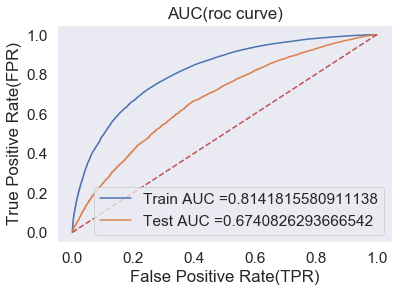

In [0]:
#RF = DecisionTreeClassifier(max_depth = depth_hyperparameter_bow, min_samples_split = split_hyperparameter_bow,class_weight='balanced')
RF = RandomForestClassifier(class_weight='balanced',n_jobs=-1,random_state=0,max_depth = depth_hyperparameter_bow_RF,min_samples_split = n_estimators_hyperparameter_bow_RF)
RF.fit(x_train_bow, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(RF, x_train_bow)    
y_test_pred = batch_predict(RF, x_test_bow)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

BOW_auc_train = auc(train_fpr, train_tpr)
BOW_auc_test = auc(test_fpr, test_tpr)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'r--')
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC(roc curve)")
plt.grid()
plt.show()

#### Confusion matrix,<font color='red'> SET 1</font>

In [0]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

the maximum value of tpr*(1-fpr) 0.5444694694364175 for threshold 0.516


TRAIN confusion matrix
[[ 8611  2934]
 [17531 47395]]


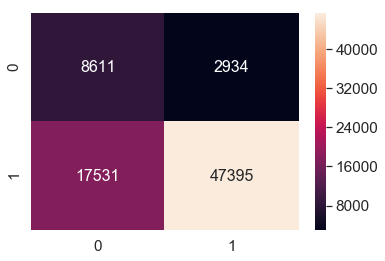

In [0]:
print("="*100)
print("TRAIN confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

Test confusion matrix
[[ 2784  2213]
 [ 8423 19354]]


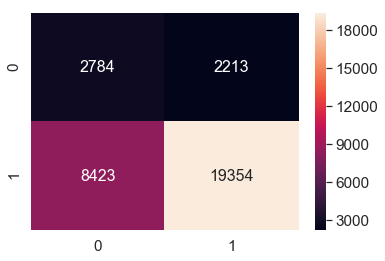

In [0]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))


conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.4.2 Applying Random Forests on TFIDF,<font color='red'> SET 2</font>

####vectorize the essay  and title data,<font color='red'> SET 2</font>

In [580]:
#convert the essay text to vector
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_essay_tfidf = TfidfVectorizer(min_df=10)
vectorizer_essay_tfidf.fit(x_train['preprocessed_essays'].values)# fit has to apply only on train data
z_tfidf1=vectorizer_essay_tfidf.fit(x_train['preprocessed_essays'].values)# fit has to apply only on train data

# we use fitted CountVectorizer to convert the text to vector
x_train_tfidf_essays = vectorizer_essay_tfidf.transform(x_train['preprocessed_essays'].values)
x_test_tfidf_essays = vectorizer_essay_tfidf.transform(x_test['preprocessed_essays'].values)

print("Shape of matrix after one hot encodig ",x_train_tfidf_essays.shape, y_train.shape)
print("Shape of matrix after one hot encodig ",x_test_tfidf_essays.shape)

Shape of matrix after one hot encodig  (41999, 11460) (41999,)
Shape of matrix after one hot encodig  (18000, 11460)


In [581]:
#convert the title text to vector
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_title_tfidf = TfidfVectorizer(min_df=10)
vectorizer_title_tfidf.fit(x_train['preprocessed_project_title'].values)# fit has to apply only on train data
z_tfidf2=vectorizer_title_tfidf.fit(x_train['preprocessed_project_title'].values)# fit has to apply only on train data

# we use fitted CountVectorizer to convert the text to vector
x_train_tfidf_title = vectorizer_title_tfidf.transform(x_train['preprocessed_project_title'].values)
x_test_tfidf_title = vectorizer_title_tfidf.transform(x_test['preprocessed_project_title'].values)

print("Shape of matrix after one hot encodig ",x_train_tfidf_title.shape)
print("Shape of matrix after one hot encodig ",x_test_tfidf_title.shape)

Shape of matrix after one hot encodig  (41999, 1919)
Shape of matrix after one hot encodig  (18000, 1919)


#### merge all sparse data,<font color='red'> SET 2</font>

In [582]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_tfidf = hstack((x_train_ohe, x_train_tfidf_essays, x_train_tfidf_title)).tocsr()
x_test_tfidf = hstack((x_test_ohe, x_test_tfidf_essays, x_test_tfidf_title)).tocsr()

print(x_train_tfidf.shape)
print(x_test_tfidf.shape)
print(type(x_train_ohe))

(41999, 13402)
(18000, 13402)
<class 'numpy.ndarray'>


In [583]:
type(x_train_tfidf)

scipy.sparse.csr.csr_matrix

#### GridsearchCV,<font color='red'> SET 2</font>

In [0]:
#https://chrisalbon.com/machine_learning/model_selection/hyperparameter_tuning_using_grid_search/
#https://discuss.analyticsvidhya.com/t/extracting-the-best-fitted-decisiontreeclassifier-after-grid-search/10029
#https://www.kaggle.com/shotashimizu/09-decisiontree-gridsearchcv
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

%time
from sklearn.model_selection import GridSearchCV,TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

print("***************Grid search cv perform on train dataset******************")


RF = RandomForestClassifier(class_weight='balanced',n_jobs=-1,random_state=0)
#params we need to try on classifier
param_grid = {'max_depth':[1, 5, 10, 50, 100, 500, 1000],
              'n_estimators':[1,5, 10, 50,100, 500,1000]}
#ts_cv = TimeSeriesSplit(n_splits=10) #For time based splitting
grid_tfidf = GridSearchCV(RF,param_grid,cv=10,verbose=1,n_jobs=-1,scoring='roc_auc',return_train_score=True)
grid_tfidf.fit(x_train_tfidf,y_train)

n_estimators_hyperparameter_tfidf_RF=grid_tfidf.best_params_['n_estimators']
depth_hyperparameter_tfidf_RF=grid_tfidf.best_params_['max_depth']
#z_accuracy_tfidf=grid_tfidf.best_score_*100
#savetofile(gsv,"Log Reg/gsv_uni")
print("Best HyperParameter: ",grid_tfidf.best_params_)
#print("Best Accuracy: %.2f%%"%(grid_tfidf.best_score_*100))


train_auc= grid_tfidf.cv_results_['mean_train_score']
train_auc_std= grid_tfidf.cv_results_['std_train_score']
cv_auc = grid_tfidf.cv_results_['mean_test_score'] 
cv_auc_std= grid_tfidf.cv_results_['std_test_score']

print("----------------------------------------------------")

Wall time: 0 ns
***************Grid search cv perform on train dataset******************
Fitting 10 folds for each of 49 candidates, totalling 490 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 429.6min
[Parallel(n_jobs=-1)]: Done 490 out of 490 | elapsed: 600.1min finished


Best HyperParameter:  {'max_depth': 100, 'n_estimators': 1000}
----------------------------------------------------


In [0]:
train_auc

array([0.53050356, 0.55383798, 0.57931511, 0.64745102, 0.66599238,
       0.68613778, 0.69138393, 0.55161861, 0.61747453, 0.65579977,
       0.71333678, 0.72469211, 0.73660117, 0.7389063 , 0.58508502,
       0.68085501, 0.72732814, 0.80088436, 0.81222038, 0.82197376,
       0.82378596, 0.80004305, 0.96783592, 0.99315025, 0.99994216,
       0.99997296, 0.99998335, 0.9999844 , 0.82430278, 0.9914651 ,
       0.99949854, 0.99997956, 0.99999431, 0.99999964, 0.99999978,
       0.82684113, 0.99222041, 0.99960988, 0.99998231, 0.99999529,
       0.99999984, 0.99999987, 0.82684113, 0.99222041, 0.99960988,
       0.99998231, 0.99999529, 0.99999984, 0.99999987])

#### 3d plot of auc value ,<font color='red'> SET 2</font>

In [0]:
import plotly
plotly.tools.set_credentials_file(username='Rana_Singh', api_key='jZjhDgnliBgNu6jqwfR7')
import plotly.plotly as py
import plotly.graph_objs as go

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [0]:
z1= list(train_auc)
x1 = pd.Series([1,1,1,1,5,5,5,5,10,10,10,10,50,50,50,50,100,100,100,100,500,500,500,500])
y1 = pd.Series([5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500])

In [0]:
trace = go.Scatter3d(
    x=x1, y=y1, z=z1,
    marker=dict(
        size=4,
        color=z1,
        colorscale='Viridis',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    )
)

In [0]:
data = [trace]
layout = dict(
    width=800,
    height=700,
    autosize=False,
    title='Hyper Parameter Tuning -- TRAIN Data',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)

In [0]:
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Decision-trees-bow', height=700)
#fig.write_image("Decision-trees-bow.png")

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Rana_Singh/0 or inside your plot.ly account where it is named 'Decision-trees-bow'


#### ROC of tain , test and cv dataset,<font color='red'> SET 2</font>

In [579]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

----------------------------------------------------


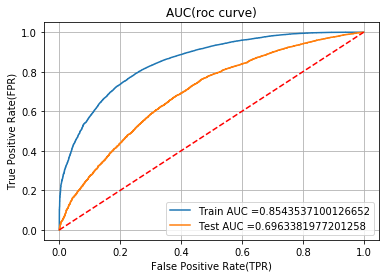

----------------------------------------------------


In [588]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(class_weight='balanced',max_depth=depth_hyperparameter_tfidf_RF,n_estimators=n_estimators_hyperparameter_tfidf_RF,n_jobs=-1,random_state=0)

RF.fit(x_train_tfidf,y_train)

print("----------------------------------------------------")

y_train_pred = batch_predict(RF, x_train_tfidf)    
y_test_pred = batch_predict(RF, x_test_tfidf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

tfidf_auc_train = auc(train_fpr, train_tpr)
tfidf_auc_test = auc(test_fpr, test_tpr)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'r--')
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC(roc curve)")
plt.grid()
plt.show()



print("----------------------------------------------------")




#### Confusion matrix,<font color='red'> SET 2</font>

In [589]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [590]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.5930734221212431 for threshold 0.505
Train confusion matrix
[[ 4963  1489]
 [ 8140 27407]]
Test confusion matrix
[[ 1535  1201]
 [ 4096 11168]]


TRAIN confusion matrix
[[ 4963  1489]
 [ 8140 27407]]


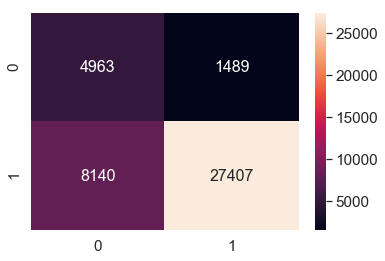

In [591]:
print("="*100)
print("TRAIN confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

Test confusion matrix
[[ 1535  1201]
 [ 4096 11168]]


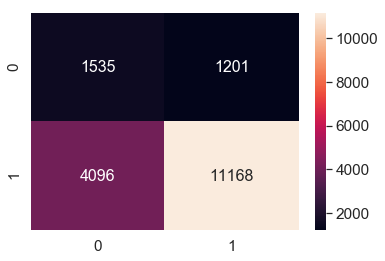

In [592]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))


conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.4.3 Applying Random Forests on AVG W2V,<font color='red'> SET 3</font>

#### vectorize using AVG W2V,<font color='red'> SET 3</font>

In [0]:

'''# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!
# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)'''




'# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(words)\n

In [594]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [595]:
#!pip install tqdm

In [596]:
# Using Pretrained Models: AVG W2V on `essay`
#_______________________________________________

# -----average Word2Vec on train
# compute average word2vec for each review.
avg_w2v_vectors_essays_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essays_train.append(vector)

print(len(avg_w2v_vectors_essays_train))
print(len(avg_w2v_vectors_essays_train[0]))

100%|██████████████████████████████████| 41999/41999 [00:13<00:00, 3095.27it/s]


41999
300


In [597]:
# -----average Word2Vec on test
# compute average word2vec for each review.
avg_w2v_vectors_essays_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essays_test.append(vector)

print(len(avg_w2v_vectors_essays_test))
print(len(avg_w2v_vectors_essays_test[0]))

100%|██████████████████████████████████| 18000/18000 [00:05<00:00, 3091.54it/s]


18000
300


In [598]:
# Using Pretrained Models: AVG W2V on `project_title`
#_____________________________________________________

# ------average Word2Vec on train
# compute average word2vec for each review.
avg_w2v_vectors_project_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_project_title_train.append(vector)

print(len(avg_w2v_vectors_project_title_train))
print(len(avg_w2v_vectors_project_title_train[0]))

100%|█████████████████████████████████| 41999/41999 [00:00<00:00, 61398.54it/s]


41999
300


In [599]:
# ------average Word2Vec on test
# compute average word2vec for each review.
avg_w2v_vectors_project_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_project_title_test.append(vector)

print(len(avg_w2v_vectors_project_title_test))
print(len(avg_w2v_vectors_project_title_test[0]))

100%|█████████████████████████████████| 18000/18000 [00:00<00:00, 58820.14it/s]


18000
300


#### merge all sparse data,<font color='red'> SET 3</font>

In [0]:
'''#converting list to array
from numpy  import array
avg_w2v_vectors_essays_train=array(avg_w2v_vectors_essays_train)
avg_w2v_vectors_project_title_train=array(avg_w2v_vectors_project_title_train)
avg_w2v_vectors_essays_cv=array(avg_w2v_vectors_essays_cv)
avg_w2v_vectors_project_title_cv=array(avg_w2v_vectors_project_title_cv)
avg_w2v_vectors_essays_test=array(avg_w2v_vectors_essays_test)
avg_w2v_vectors_project_title_test=array(avg_w2v_vectors_project_title_test)

print(avg_w2v_vectors_essays_train.shape)
print(avg_w2v_vectors_project_title_train.shape)
print(avg_w2v_vectors_essays_cv.shape)
print(avg_w2v_vectors_project_title_cv.shape)
print(avg_w2v_vectors_essays_test.shape)
print(avg_w2v_vectors_project_title_test.shape)
print(x_train_ohe.shape)
print(x_cv_ohe.shape)
print(x_test_ohe.shape)'''

'#converting list to array\nfrom numpy  import array\navg_w2v_vectors_essays_train=array(avg_w2v_vectors_essays_train)\navg_w2v_vectors_project_title_train=array(avg_w2v_vectors_project_title_train)\navg_w2v_vectors_essays_cv=array(avg_w2v_vectors_essays_cv)\navg_w2v_vectors_project_title_cv=array(avg_w2v_vectors_project_title_cv)\navg_w2v_vectors_essays_test=array(avg_w2v_vectors_essays_test)\navg_w2v_vectors_project_title_test=array(avg_w2v_vectors_project_title_test)\n\nprint(avg_w2v_vectors_essays_train.shape)\nprint(avg_w2v_vectors_project_title_train.shape)\nprint(avg_w2v_vectors_essays_cv.shape)\nprint(avg_w2v_vectors_project_title_cv.shape)\nprint(avg_w2v_vectors_essays_test.shape)\nprint(avg_w2v_vectors_project_title_test.shape)\nprint(x_train_ohe.shape)\nprint(x_cv_ohe.shape)\nprint(x_test_ohe.shape)'

In [0]:
print(type(x_train_ohe))
print(type(avg_w2v_vectors_essays_train))
print(type(avg_w2v_vectors_project_title_train))


<class 'numpy.ndarray'>
<class 'list'>
<class 'list'>


In [600]:
#https://stackoverflow.com/questions/43977463/valueerror-could-not-broadcast-input-array-from-shape-224-224-3-into-shape-2
#https://stackoverflow.com/questions/5951135/how-to-save-a-list-as-numpy-array-in-python
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)

x_train_AVGW2V = np.hstack((x_train_ohe, avg_w2v_vectors_essays_train, avg_w2v_vectors_project_title_train))
x_test_AVGW2V = np.hstack((x_test_ohe, avg_w2v_vectors_essays_test, avg_w2v_vectors_project_title_test))

print(x_train_AVGW2V.shape)
print(x_test_AVGW2V.shape)

(41999, 623)
(18000, 623)


#### GridsearchCV,<font color='red'> SET 3</font>

In [0]:
#https://chrisalbon.com/machine_learning/model_selection/hyperparameter_tuning_using_grid_search/
#https://discuss.analyticsvidhya.com/t/extracting-the-best-fitted-decisiontreeclassifier-after-grid-search/10029
#https://www.kaggle.com/shotashimizu/09-decisiontree-gridsearchcv
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

%time
from sklearn.model_selection import GridSearchCV,TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

print("***************Grid search cv perform on train dataset******************")


RF = RandomForestClassifier(class_weight='balanced',n_jobs=-1,random_state=0)
#params we need to try on classifier
param_grid = {'max_depth':[1, 5, 10, 50, 100, 500, 1000],
              'n_estimators':[1,5, 10, 50,100, 500,1000]}
#ts_cv = TimeSeriesSplit(n_splits=10) #For time based splitting
grid_AVGW2V = GridSearchCV(RF,param_grid,cv=10,verbose=1,n_jobs=-1,scoring='roc_auc',return_train_score=True)
grid_AVGW2V.fit(x_train_AVGW2V,y_train)

n_estimators_hyperparameter_AVGW2V_RF=grid_AVGW2V.best_params_['n_estimators']
depth_hyperparameter_AVGW2V_RF=grid_AVGW2V.best_params_['max_depth']
#z_accuracy_AVGW2V=grid_AVGW2V.best_score_*100
#savetofile(gsv,"Log Reg/gsv_uni")
print("Best HyperParameter: ",grid_AVGW2V.best_params_)
#print("Best Accuracy: %.2f%%"%(grid_AVGW2V.best_score_*100))


train_auc= grid_AVGW2V.cv_results_['mean_train_score']
train_auc_std= grid_AVGW2V.cv_results_['std_train_score']
cv_auc = grid_AVGW2V.cv_results_['mean_test_score'] 
cv_auc_std= grid_AVGW2V.cv_results_['std_test_score']

print("----------------------------------------------------")

Wall time: 1e+03 µs
***************Grid search cv perform on train dataset******************
Fitting 10 folds for each of 49 candidates, totalling 490 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 99.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 558.9min
[Parallel(n_jobs=-1)]: Done 490 out of 490 | elapsed: 695.9min finished


Best HyperParameter:  {'max_depth': 10, 'n_estimators': 1000}
----------------------------------------------------


In [0]:
train_auc

array([0.52594168, 0.5764352 , 0.60888076, 0.64820712, 0.65643832,
       0.66167631, 0.66032587, 0.59869106, 0.66628741, 0.68941345,
       0.71140684, 0.71411786, 0.71732204, 0.71741318, 0.68634868,
       0.8288677 , 0.87996503, 0.93854968, 0.94651319, 0.9530331 ,
       0.95404501, 0.82366426, 0.99223872, 0.99962253, 0.99997801,
       0.99999433, 0.99999989, 0.9999999 , 0.82320543, 0.99241507,
       0.99963186, 0.9999767 , 0.99999464, 0.9999999 , 0.9999999 ,
       0.82320543, 0.99241507, 0.99963186, 0.9999767 , 0.99999464,
       0.9999999 , 0.9999999 , 0.82320543, 0.99241507, 0.99963186,
       0.9999767 , 0.99999464, 0.9999999 , 0.9999999 ])

#### 3d plot of auc value ,<font color='red'> SET 3</font>

In [0]:
import plotly
plotly.tools.set_credentials_file(username='Rana_Singh', api_key='jZjhDgnliBgNu6jqwfR7')
import plotly.plotly as py
import plotly.graph_objs as go

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d



z1= list(train_auc)
x1 = pd.Series([1,1,1,1,1,1,1,5,5,5,5,5,5,5,10,10,10,10,10,10,10,50,50,50,50,50,50,50,100,100,100,100,100,100,100,500,500,500,500,500,500,500,1000,1000,1000,1000,1000,1000,1000])
y1 = pd.Series([1,5, 10, 50,100, 500,1000,1,5, 10, 50,100, 500,1000,1,5, 10, 50,100, 500,1000,1,5, 10, 50,100, 500,1000,1,5, 10, 50,100, 500,1000,1,5, 10, 50,100, 500,1000,1,5, 10, 50,100, 500,1000])

In [0]:
trace = go.Scatter3d(
    x=x1, y=y1, z=z1,
    marker=dict(
        size=4,
        color=z1,
        colorscale='Viridis',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    )
)

In [0]:

data = [trace]
layout = dict(
    width=800,
    height=700,
    autosize=False,
    title='Hyper Parameter Tuning -- TRAIN Data',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)


In [0]:
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Random forest-AVGW2V', height=700)

#### ROC of tain , test and cv dataset,<font color='red'> SET 3</font>

----------------------------------------------------


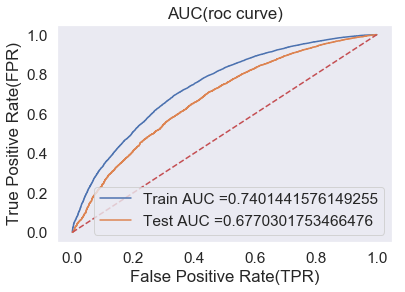

----------------------------------------------------


In [602]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(class_weight='balanced',max_depth=depth_hyperparameter_AVGW2V_RF,n_estimators=n_estimators_hyperparameter_AVGW2V_RF,n_jobs=-1,random_state=0)

RF.fit(x_train_AVGW2V,y_train)

print("----------------------------------------------------")

y_train_pred = batch_predict(RF, x_train_AVGW2V)    
y_test_pred = batch_predict(RF, x_test_AVGW2V)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

AVGW2V_auc_train = auc(train_fpr, train_tpr)
AVGW2V_auc_test = auc(test_fpr, test_tpr)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'r--')
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC(roc curve)")
plt.grid()
plt.show()



print("----------------------------------------------------")




#### Confusion matrix,<font color='red'> SET 3</font>

In [603]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

the maximum value of tpr*(1-fpr) 0.4614078954626945 for threshold 0.502


TRAIN confusion matrix
[[ 4292  2160]
 [10891 24656]]


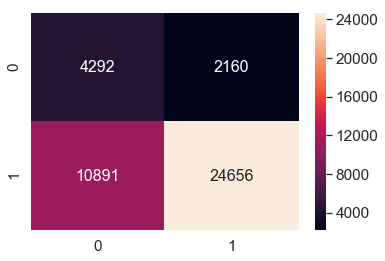

In [604]:
print("="*100)
print("TRAIN confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

Test confusion matrix
[[ 1587  1149]
 [ 4983 10281]]


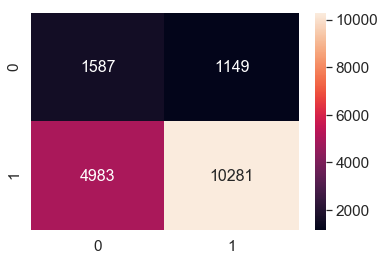

In [605]:
  
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))


conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.4.4 Applying Random Forests on TFIDF W2V,<font color='red'> SET 4</font>

#### Vectorize using TFIDF W2V,<font color='red'> SET 4</font>

In [606]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(x_train['preprocessed_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


In [607]:
#Using Pretrained Models: TFIDFW weighted W2V on `essay
#___________________________________

# average Word2Vec---train
# compute average word2vec for each review.
tfidf_w2v_vectors_essays_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essays_train.append(vector)

print(len(tfidf_w2v_vectors_essays_train))
print(len(tfidf_w2v_vectors_essays_train[0]))

100%|███████████████████████████████████| 41999/41999 [01:27<00:00, 481.18it/s]


41999
300


In [608]:
# average Word2Vec---test
# compute average word2vec for each review.
tfidf_w2v_vectors_essays_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essays_test.append(vector)

print(len(tfidf_w2v_vectors_essays_test))
print(len(tfidf_w2v_vectors_essays_test[0]))

100%|███████████████████████████████████| 18000/18000 [00:36<00:00, 487.38it/s]


18000
300


In [609]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(x_train['preprocessed_project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [610]:
#Using Pretrained Models: TFIDFW weighted W2V on "preprocessed_project_title"
#___________________________________________
# average Word2Vec--train
# compute average word2vec for each review.
tfidf_w2v_vectors_project_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_project_title_train.append(vector)

print(len(tfidf_w2v_vectors_project_title_train))
print(len(tfidf_w2v_vectors_project_title_train[0]))

100%|█████████████████████████████████| 41999/41999 [00:01<00:00, 30925.33it/s]


41999
300


In [611]:
# average Word2Vec--test
# compute average word2vec for each review.
tfidf_w2v_vectors_project_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_project_title_test.append(vector)

print(len(tfidf_w2v_vectors_project_title_test))
print(len(tfidf_w2v_vectors_project_title_test[0]))

100%|█████████████████████████████████| 18000/18000 [00:00<00:00, 31632.64it/s]


18000
300


#### merge all aparse data,<font color='red'> SET 4</font>

In [612]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_TFIDFW2V = np.hstack((x_train_ohe, tfidf_w2v_vectors_essays_train, tfidf_w2v_vectors_project_title_train))

x_test_TFIDFW2V = np.hstack((x_test_ohe, tfidf_w2v_vectors_essays_test, tfidf_w2v_vectors_project_title_test))

print(x_train_TFIDFW2V.shape)

print(x_test_TFIDFW2V.shape)

(41999, 623)
(18000, 623)


#### GridsearchCV,<font color='red'> SET 4</font>

In [0]:
#https://chrisalbon.com/machine_learning/model_selection/hyperparameter_tuning_using_grid_search/
#https://discuss.analyticsvidhya.com/t/extracting-the-best-fitted-decisiontreeclassifier-after-grid-search/10029
#https://www.kaggle.com/shotashimizu/09-decisiontree-gridsearchcv
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

%time
from sklearn.model_selection import GridSearchCV,TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

print("***************Grid search cv perform on train dataset******************")


RF = RandomForestClassifier(class_weight='balanced',n_jobs=-1,random_state=0)
#params we need to try on classifier
param_grid = {'max_depth':[1, 5, 10, 50, 100, 500, 1000],
              'n_estimators':[1,5, 10, 50,100, 500,1000]}
#ts_cv = TimeSeriesSplit(n_splits=10) #For time based splitting
grid_TFIDFW2V = GridSearchCV(RF,param_grid,cv=10,verbose=1,n_jobs=-1,scoring='roc_auc',return_train_score=True)
grid_TFIDFW2V.fit(x_train_TFIDFW2V,y_train)

n_estimators_hyperparameter_TFIDFW2V_RF=grid_TFIDFW2V.best_params_['n_estimators']
depth_hyperparameter_TFIDFW2V_RF=grid_TFIDFW2V.best_params_['max_depth']
#z_accuracy_TFIDFW2V=grid_TFIDFW2V.best_score_*100
#savetofile(gsv,"Log Reg/gsv_uni")
print("Best HyperParameter: ",grid_TFIDFW2V.best_params_)
#print("Best Accuracy: %.2f%%"%(grid_TFIDFW2V.best_score_*100))


train_auc= grid_TFIDFW2V.cv_results_['mean_train_score']
train_auc_std= grid_TFIDFW2V.cv_results_['std_train_score']
cv_auc = grid_TFIDFW2V.cv_results_['mean_test_score'] 
cv_auc_std= grid_TFIDFW2V.cv_results_['std_test_score']

print("----------------------------------------------------")

Wall time: 0 ns
***************Grid search cv perform on train dataset******************
Fitting 10 folds for each of 49 candidates, totalling 490 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 93.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 552.9min
[Parallel(n_jobs=-1)]: Done 490 out of 490 | elapsed: 689.1min finished


Best HyperParameter:  {'max_depth': 10, 'n_estimators': 1000}
----------------------------------------------------


In [0]:
train_auc

array([0.54025824, 0.58723437, 0.61469956, 0.64881229, 0.65283031,
       0.65806219, 0.65772367, 0.60739382, 0.66921099, 0.68794849,
       0.70719774, 0.70959994, 0.71141431, 0.71184636, 0.69326758,
       0.82844954, 0.87322323, 0.92178845, 0.92894337, 0.93479801,
       0.93575667, 0.82459439, 0.99237434, 0.99962846, 0.99997646,
       0.99999309, 0.99999982, 0.99999987, 0.82460922, 0.99237347,
       0.99963358, 0.99997781, 0.9999939 , 0.99999984, 0.99999987,
       0.82460922, 0.99237347, 0.99963358, 0.99997781, 0.9999939 ,
       0.99999984, 0.99999987, 0.82460922, 0.99237347, 0.99963358,
       0.99997781, 0.9999939 , 0.99999984, 0.99999987])

#### 3d plot of auc value ,<font color='red'> SET 4</font>

In [0]:
import plotly
plotly.tools.set_credentials_file(username='Rana_Singh', api_key='jZjhDgnliBgNu6jqwfR7')
import plotly.plotly as py
import plotly.graph_objs as go

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d



z1= list(train_auc)
x1 = pd.Series([1,1,1,1,1,1,1,5,5,5,5,5,5,5,10,10,10,10,10,10,10,50,50,50,50,50,50,50,100,100,100,100,100,100,100,500,500,500,500,500,500,500,1000,1000,1000,1000,1000,1000,1000])
y1 = pd.Series([1,5, 10, 50,100, 500,1000,1,5, 10, 50,100, 500,1000,1,5, 10, 50,100, 500,1000,1,5, 10, 50,100, 500,1000,1,5, 10, 50,100, 500,1000,1,5, 10, 50,100, 500,1000,1,5, 10, 50,100, 500,1000])

In [0]:
trace = go.Scatter3d(
    x=x1, y=y1, z=z1,
    marker=dict(
        size=4,
        color=z1,
        colorscale='Viridis',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    )
)


In [0]:

data = [trace]
layout = dict(
    width=800,
    height=700,
    autosize=False,
    title='Hyper Parameter Tuning -- TRAIN Data',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)


In [0]:


fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Random forest-TFIDFW2V', height=700)

#### ROC of tain , test and cv dataset,<font color='red'> SET 4</font>

----------------------------------------------------


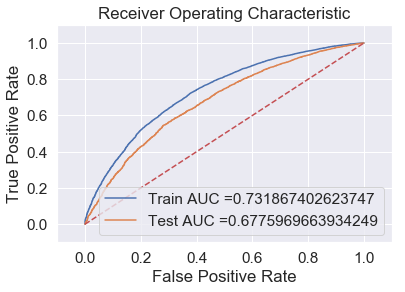

In [617]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

RF4 = RandomForestClassifier(class_weight='balanced',max_depth=depth_hyperparameter_TFIDFW2V_RF,n_estimators=n_estimators_hyperparameter_TFIDFW2V_RF,n_jobs=-1,random_state=0)

RF4.fit(x_train_TFIDFW2V,y_train)

print("----------------------------------------------------")

y_train_pred = batch_predict(RF4, x_train_TFIDFW2V)    
y_test_pred = batch_predict(RF4, x_test_TFIDFW2V)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

TFIDFW2V_auc_train = auc(train_fpr, train_tpr)
TFIDFW2V_auc_test = auc(test_fpr, test_tpr)

#---------------------------------------------------
#value taken from from GridsearchCV section
plt.title('Receiver Operating Characteristic')
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()




#### Confusion matrix,<font color='red'> SET 4</font>

In [618]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

the maximum value of tpr*(1-fpr) 0.4500597917820039 for threshold 0.499


TRAIN confusion matrix
[[ 4417  2035]
 [12178 23369]]


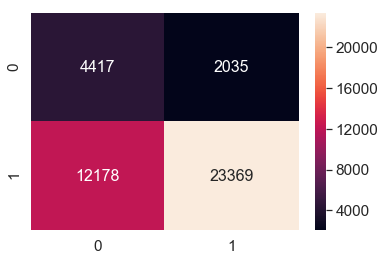

In [619]:
print("="*100)
print("TRAIN confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

Test confusion matrix
[[1687 1049]
 [5562 9702]]


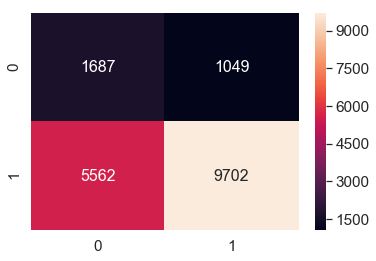

In [620]:
  
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))


conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.5.1 Applying XGBOOST on BOW,<font color='red'> SET 1</font>

#### vectorize the title and essay ,<font color='red'> SET 1</font>

In [0]:
####vectorize the essay  and title data, <font color='red'> SET 1</font>

# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

#vectorize the essay
#______________________________
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer_essay_bow = CountVectorizer(min_df=10)
vectorizer_essay_bow.fit(x_train['preprocessed_essays'].values)# fit has to apply only on train data
#z_bow1=vectorizer.fit(x_train['preprocessed_essays'].values)# fit has to apply only on train data

# we use fitted CountVectorizer to convert the text to vector
x_train_bow_essays = vectorizer_essay_bow.transform(x_train['preprocessed_essays'].values)
x_test_bow_essays = vectorizer_essay_bow.transform(x_test['preprocessed_essays'].values)

print("Shape of matrix after one hot encodig ",x_train_bow_essays.shape, y_train.shape)
print("Shape of matrix after one hot encodig ",x_test_bow_essays.shape)



Shape of matrix after one hot encodig  (76471, 14504) (76471,)
Shape of matrix after one hot encodig  (32774, 14504)


In [0]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
#you can vectorize the title
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer_title_bow = CountVectorizer(min_df=10)
vectorizer_title_bow.fit(x_train['preprocessed_project_title'].values)# fit has to apply only on train data
#z_bow2=vectorizer.fit(x_train['preprocessed_project_title'].values)# fit has to apply only on train data

# we use fitted CountVectorizer to convert the text to vector
x_train_bow_title = vectorizer_title_bow.transform(x_train['preprocessed_project_title'].values)
x_test_bow_title = vectorizer_title_bow.transform(x_test['preprocessed_project_title'].values)

print("Shape of matrix after one hot encodig ",x_train_bow_title.shape)
print("Shape of matrix after one hot encodig ",x_test_bow_title.shape)

Shape of matrix after one hot encodig  (76471, 2698)
Shape of matrix after one hot encodig  (32774, 2698)


#### merge dataset ,<font color='red'> SET 1</font>

In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_bow = hstack((x_train_ohe, x_train_bow_essays, x_train_bow_title))
x_test_bow = hstack((x_test_ohe, x_test_bow_essays, x_test_bow_title))


print(x_train_bow.shape)
print(x_test_bow.shape)

(76471, 17225)
(32774, 17225)


#### GridsearchCV ,<font color='red'> SET 1</font>

In [0]:
!pip install xgboost

In [0]:
%time
from sklearn.model_selection import GridSearchCV,TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc

print("***************Grid search cv perform on train dataset******************")

gbdt1 = XGBClassifier(booster='gbtree')#class_weight='balanced'?(why)
#params we need to try on classifier
param_grid = {'max_depth':[3,5,7,9,11,13],
              'n_estimators':[5, 10, 50, 100,300 ,500]}
#ts_cv = TimeSeriesSplit(n_splits=10) #For time based splitting
grid_bow = GridSearchCV(gbdt1,param_grid,cv=10,verbose=1,n_jobs=-1,scoring='roc_auc',return_train_score=True)
grid_bow.fit(x_train_bow,y_train)

n_estimators_hyperparameter_bow_gbdt=grid_bow.best_params_['n_estimators']
depth_hyperparameter_bow_gbdt=grid_bow.best_params_['max_depth']

#savetofile(gsv,"Log Reg/gsv_uni")
print("Best HyperParameter: ",grid_bow.best_params_)



train_auc= grid_bow.cv_results_['mean_train_score']
train_auc_std= grid_bow.cv_results_['std_train_score']
cv_auc = grid_bow.cv_results_['mean_test_score'] 
cv_auc_std= grid_bow.cv_results_['std_test_score']

print("----------------------------------------------------")

Wall time: 0 ns
***************Grid search cv perform on train dataset******************
Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 110.5min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 331.7min finished


Best HyperParameter:  {'max_depth': 5, 'n_estimators': 500}
----------------------------------------------------


In [0]:
arr_depth=grid_bow.cv_results_['param_max_depth'] 
arr_estimator=grid_bow.cv_results_['param_n_estimators']
data = [] #  List of tuples(depth,estimators)
for i in range(arr_depth.shape[0]):
    data.append(str((arr_depth[i],arr_estimator[i])))
    


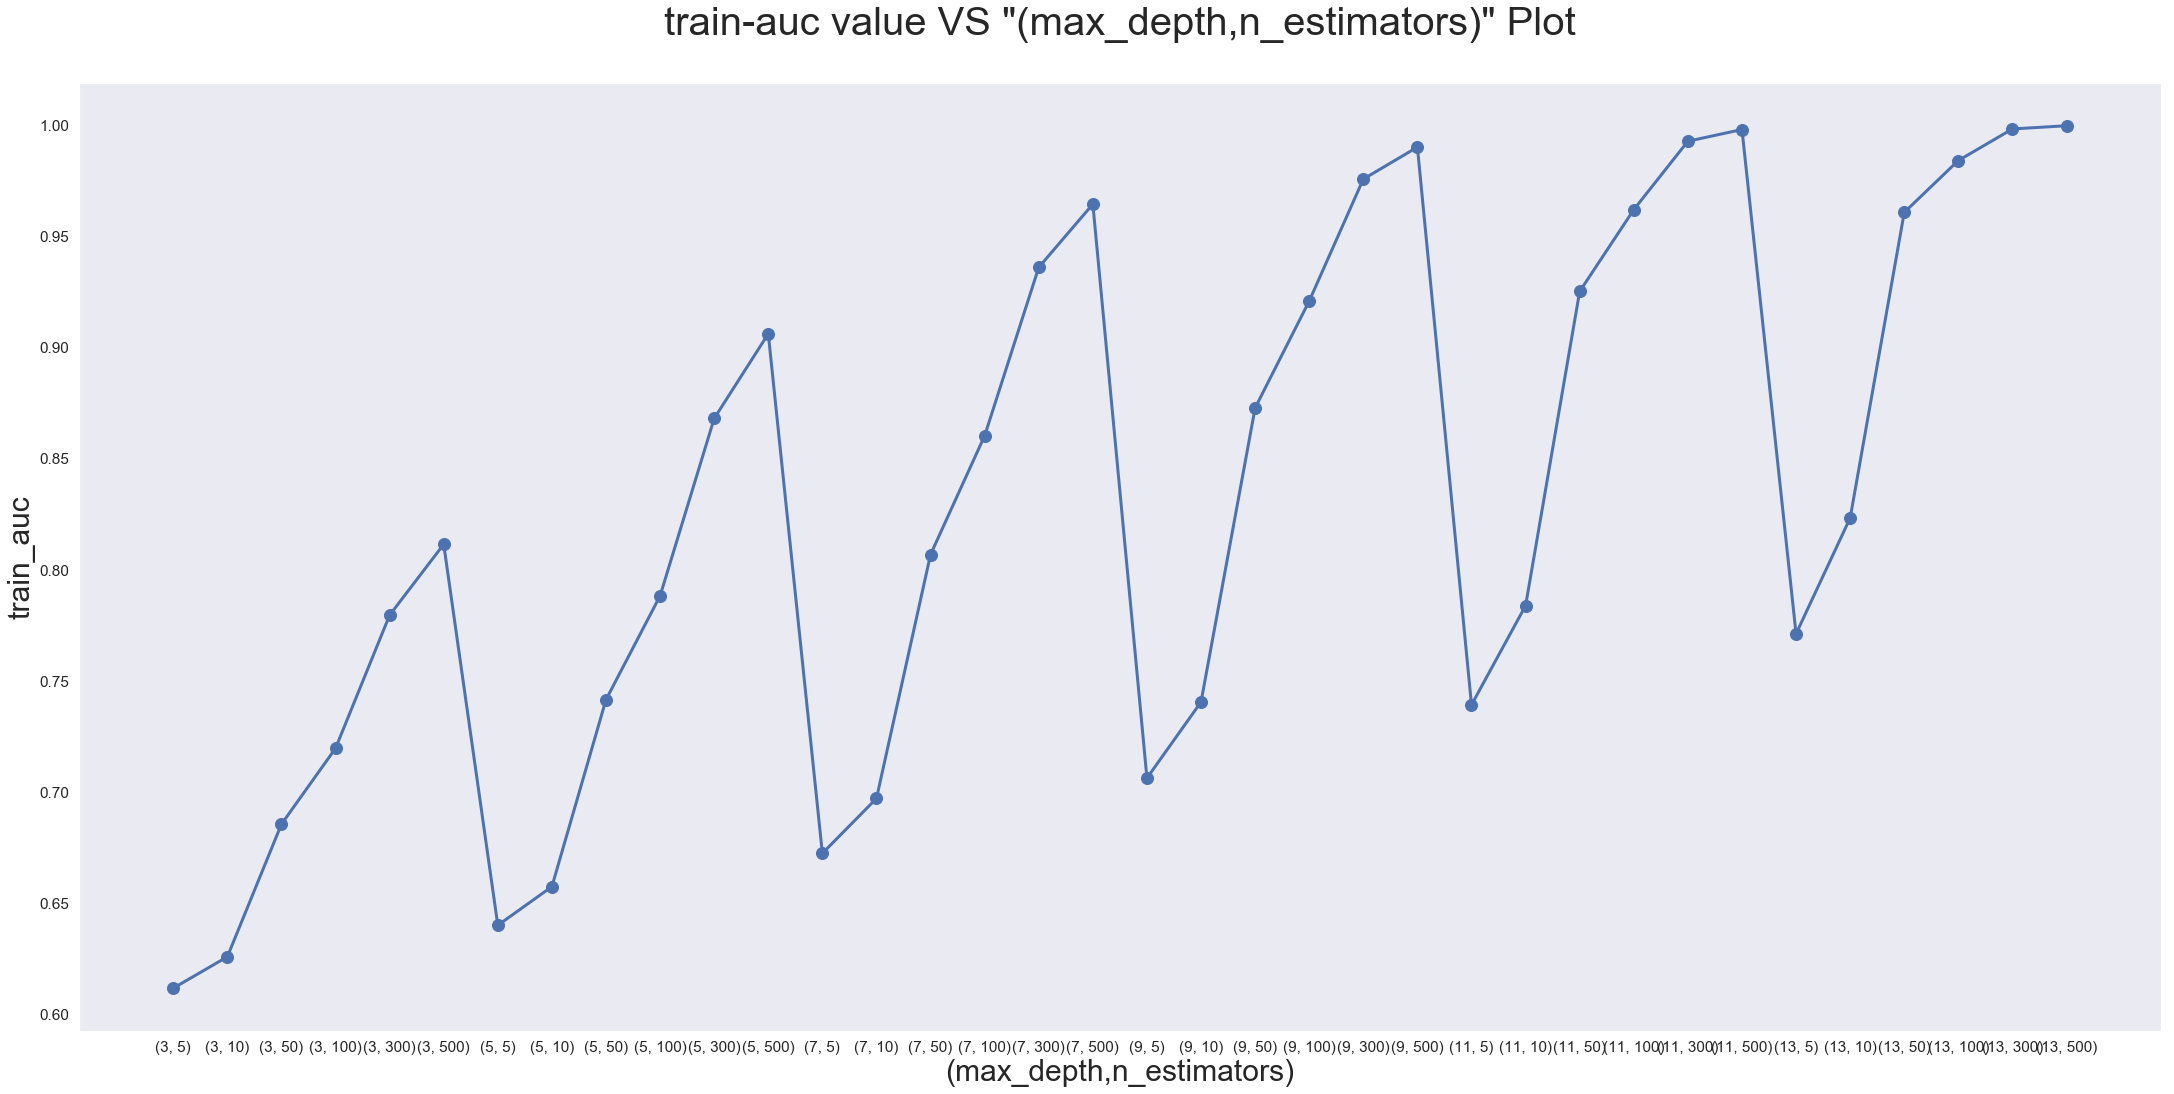

In [0]:
# plotting Cross-Validation Error vs tuples of (max_depth,n_estimators) graph  
plt.figure(figsize=(30,15))
plt.plot(data, train_auc,linewidth=3, marker='o',markersize=12)
plt.xlabel('(max_depth,n_estimators)',size=30)
plt.ylabel('train_auc',size=30)
plt.title('train-auc value VS "(max_depth,n_estimators)" Plot\n',size=40)
plt.tight_layout(pad=0.0)
plt.grid()
plt.show()

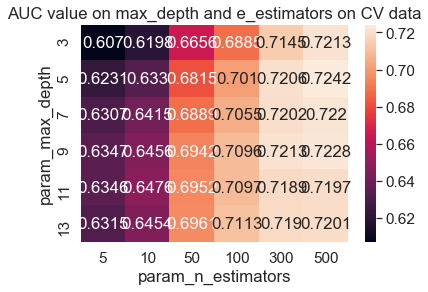

In [0]:
df_gridsearch = pd.DataFrame(grid_bow.cv_results_)
max_scores = df_gridsearch.groupby(['param_max_depth','param_n_estimators']).max()
max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g')
plt.title('AUC value on max_depth and e_estimators on CV data')
plt.show()




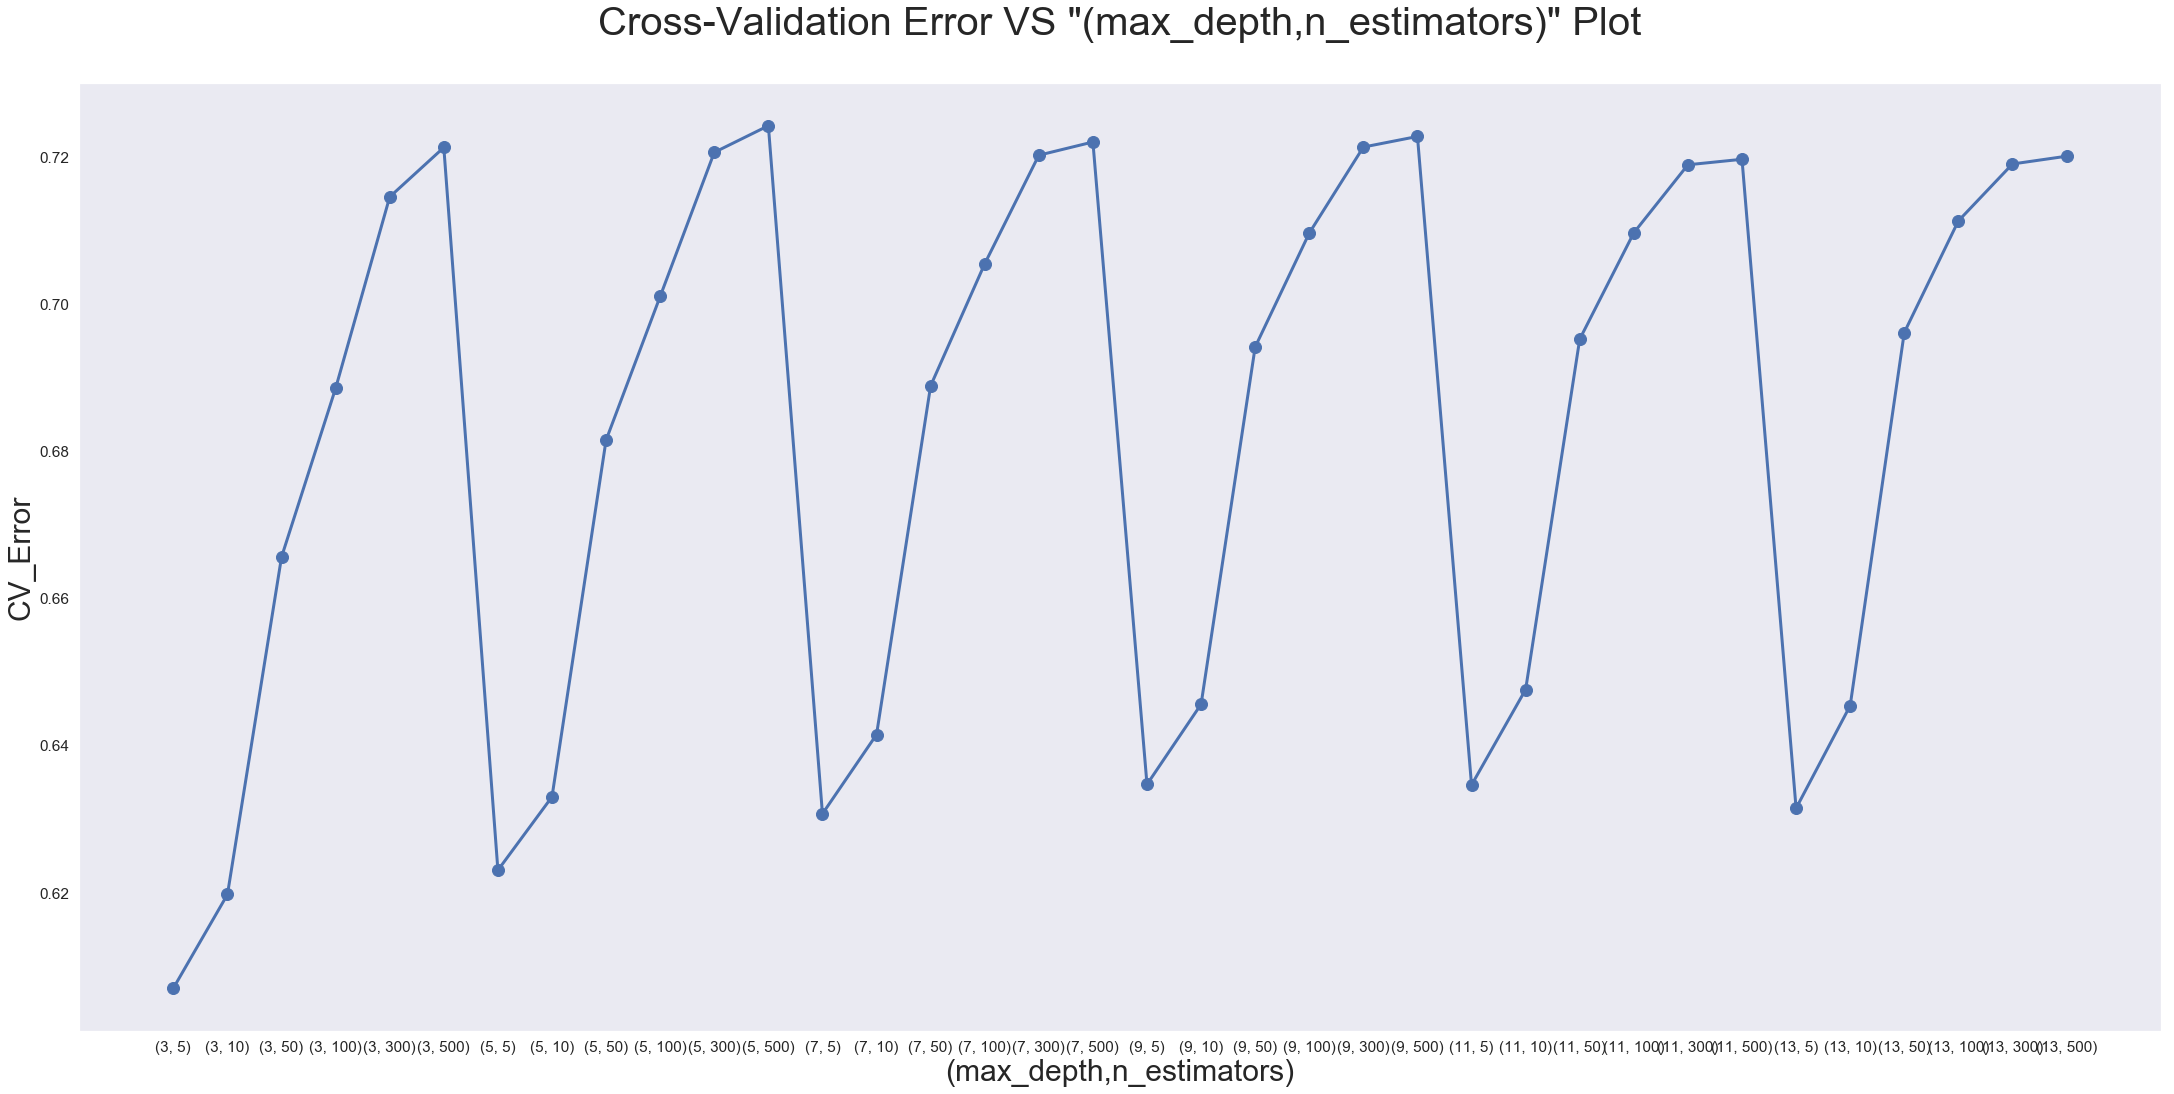

In [0]:
#plotting Cross-Validation Error vs tuples of (max_depth,n_estimators) graph  
plt.figure(figsize=(30,15))
plt.plot(data, cv_auc,linewidth=3, marker='o',markersize=12)
plt.xlabel('(max_depth,n_estimators)',size=30)
plt.ylabel('CV_Error',size=30)
plt.title('Cross-Validation Error VS "(max_depth,n_estimators)" Plot\n',size=40)
plt.tight_layout(pad=0.0)
plt.grid()
plt.show()

In [0]:
arr_depth

masked_array(data=[3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7, 7,
                   9, 9, 9, 9, 9, 9, 11, 11, 11, 11, 11, 11, 13, 13, 13,
                   13, 13, 13],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fill_value='?',
            dtype=object)

In [0]:
train_auc

array([0.61174183, 0.6258537 , 0.68549574, 0.71963969, 0.7795437 ,
       0.81143145, 0.64003305, 0.65742014, 0.74151322, 0.78822759,
       0.86801559, 0.90612875, 0.67240059, 0.69709872, 0.80681919,
       0.86025033, 0.9359974 , 0.9644365 , 0.70624273, 0.74047227,
       0.87276092, 0.92084008, 0.97569726, 0.99008099, 0.73917786,
       0.78380738, 0.92518564, 0.96195942, 0.9927335 , 0.99799767,
       0.77116078, 0.82324648, 0.96072355, 0.98406054, 0.99825581,
       0.99970631])

In [0]:
depth_hyperparameter_bow_gbdt

5

#### ROC on train and test dataset ,<font color='red'> SET 1</font>

----------------------------------------------------


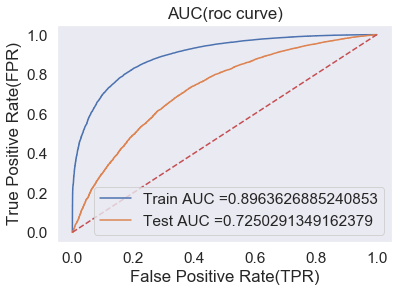

In [0]:
#ROC on test data
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier

gbdt = XGBClassifier(booster='gbtree',max_depth=depth_hyperparameter_bow_gbdt,n_estimators=n_estimators_hyperparameter_bow_gbdt,random_state=0)
gbdt.fit(x_train_bow,y_train)

print("----------------------------------------------------")
y_train_pred = gbdt.predict_proba(x_train_bow)[:,1]    
y_test_pred = gbdt.predict_proba(x_test_bow)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

BOW_auc_train_gbdt = auc(train_fpr, train_tpr)
BOW_auc_test_gbdt = auc(test_fpr, test_tpr)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'r--')
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC(roc curve)")
plt.grid()
plt.show()



In [190]:
n_estimators_hyperparameter_bow_gbdt=500
depth_hyperparameter_bow_gbdt=5

#### Confusing matrix ,<font color='red'> SET 1</font>

In [0]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions




In [0]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

the maximum value of tpr*(1-fpr) 0.6627555557903566 for threshold 0.817


TRAIN confusion matrix
[[ 9578  1967]
 [13059 51867]]


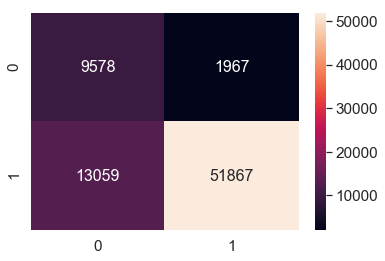

In [0]:
print("="*100)
print("TRAIN confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

Test confusion matrix
[[ 2915  2082]
 [ 6788 20989]]


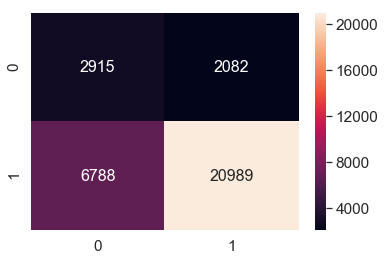

In [0]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))


conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.5.2 Applying XGBOOST on TFIDF,<font color='red'> SET 2</font>

In [0]:
# Please write all the code with proper documentation

In [0]:
# Please write all the code with proper documentation

####vectorize essay and title dataset ,<font color='red'> SET 2</font>

In [0]:
####vectorize the essay  and title data,<font color='red'> SET 2</font>

#convert the essay text to vector
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_essay_tfidf = TfidfVectorizer(min_df=10)
vectorizer_essay_tfidf.fit(x_train['preprocessed_essays'].values)# fit has to apply only on train data
z_tfidf1=vectorizer_essay_tfidf.fit(x_train['preprocessed_essays'].values)# fit has to apply only on train data

# we use fitted CountVectorizer to convert the text to vector
x_train_tfidf_essays = vectorizer_essay_tfidf.transform(x_train['preprocessed_essays'].values)

x_test_tfidf_essays = vectorizer_essay_tfidf.transform(x_test['preprocessed_essays'].values)

print("Shape of matrix after one hot encodig ",x_train_tfidf_essays.shape, y_train.shape)

print("Shape of matrix after one hot encodig ",x_test_tfidf_essays.shape)



Shape of matrix after one hot encodig  (76471, 14504) (76471,)
Shape of matrix after one hot encodig  (32774, 14504)


In [0]:
#convert the title text to vector
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_title_tfidf = TfidfVectorizer(min_df=10)
vectorizer_title_tfidf.fit(x_train['preprocessed_project_title'].values)# fit has to apply only on train data
z_tfidf2=vectorizer_title_tfidf.fit(x_train['preprocessed_project_title'].values)# fit has to apply only on train data

# we use fitted CountVectorizer to convert the text to vector
x_train_tfidf_title = vectorizer_title_tfidf.transform(x_train['preprocessed_project_title'].values)

x_test_tfidf_title = vectorizer_title_tfidf.transform(x_test['preprocessed_project_title'].values)

print("Shape of matrix after one hot encodig ",x_train_tfidf_title.shape)

print("Shape of matrix after one hot encodig ",x_test_tfidf_title.shape)

Shape of matrix after one hot encodig  (76471, 2698)
Shape of matrix after one hot encodig  (32774, 2698)


#### merge dataset ,<font color='red'> SET 2</font>

In [0]:
#### merge all sparse data,<font color='red'> SET 2</font>

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_tfidf = hstack((x_train_ohe, x_train_tfidf_essays, x_train_tfidf_title))

x_test_tfidf = hstack((x_test_ohe, x_test_tfidf_essays, x_test_tfidf_title))

print(x_train_tfidf.shape)

print(x_test_tfidf.shape)
print(type(x_train_ohe))

(76471, 17225)
(32774, 17225)
<class 'numpy.ndarray'>


#### GridsearchCV ,<font color='red'> SET 2</font>

In [0]:
%time
from sklearn.model_selection import GridSearchCV,TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc

print("***************Grid search cv perform on train dataset******************")

gbdt1 = XGBClassifier(booster='gbtree')#class_weight='balanced'?(why)
#params we need to try on classifier
param_grid = {'max_depth':[3,5,7,9,11,13],
              'n_estimators':[5, 10, 50, 100,300 ,500,1000]}
#ts_cv = TimeSeriesSplit(n_splits=10) #For time based splitting
grid_tfidf = GridSearchCV(gbdt1,param_grid,cv=10,verbose=1,n_jobs=-1,scoring='roc_auc',return_train_score=True)
grid_tfidf.fit(x_train_tfidf,y_train)

n_estimators_hyperparameter_tfidf_gbdt=grid_tfidf.best_params_['n_estimators']
depth_hyperparameter_tfidf_gbdt=grid_tfidf.best_params_['max_depth']

#savetofile(gsv,"Log Reg/gsv_uni")
print("Best HyperParameter: ",grid_tfidf.best_params_)



train_auc= grid_tfidf.cv_results_['mean_train_score']
train_auc_std= grid_tfidf.cv_results_['std_train_score']
cv_auc = grid_tfidf.cv_results_['mean_test_score'] 
cv_auc_std= grid_tfidf.cv_results_['std_test_score']

print("----------------------------------------------------")

Wall time: 0 ns
***************Grid search cv perform on train dataset******************
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 354.2min
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed: 1671.0min finished


Best HyperParameter:  {'max_depth': 3, 'n_estimators': 1000}
----------------------------------------------------


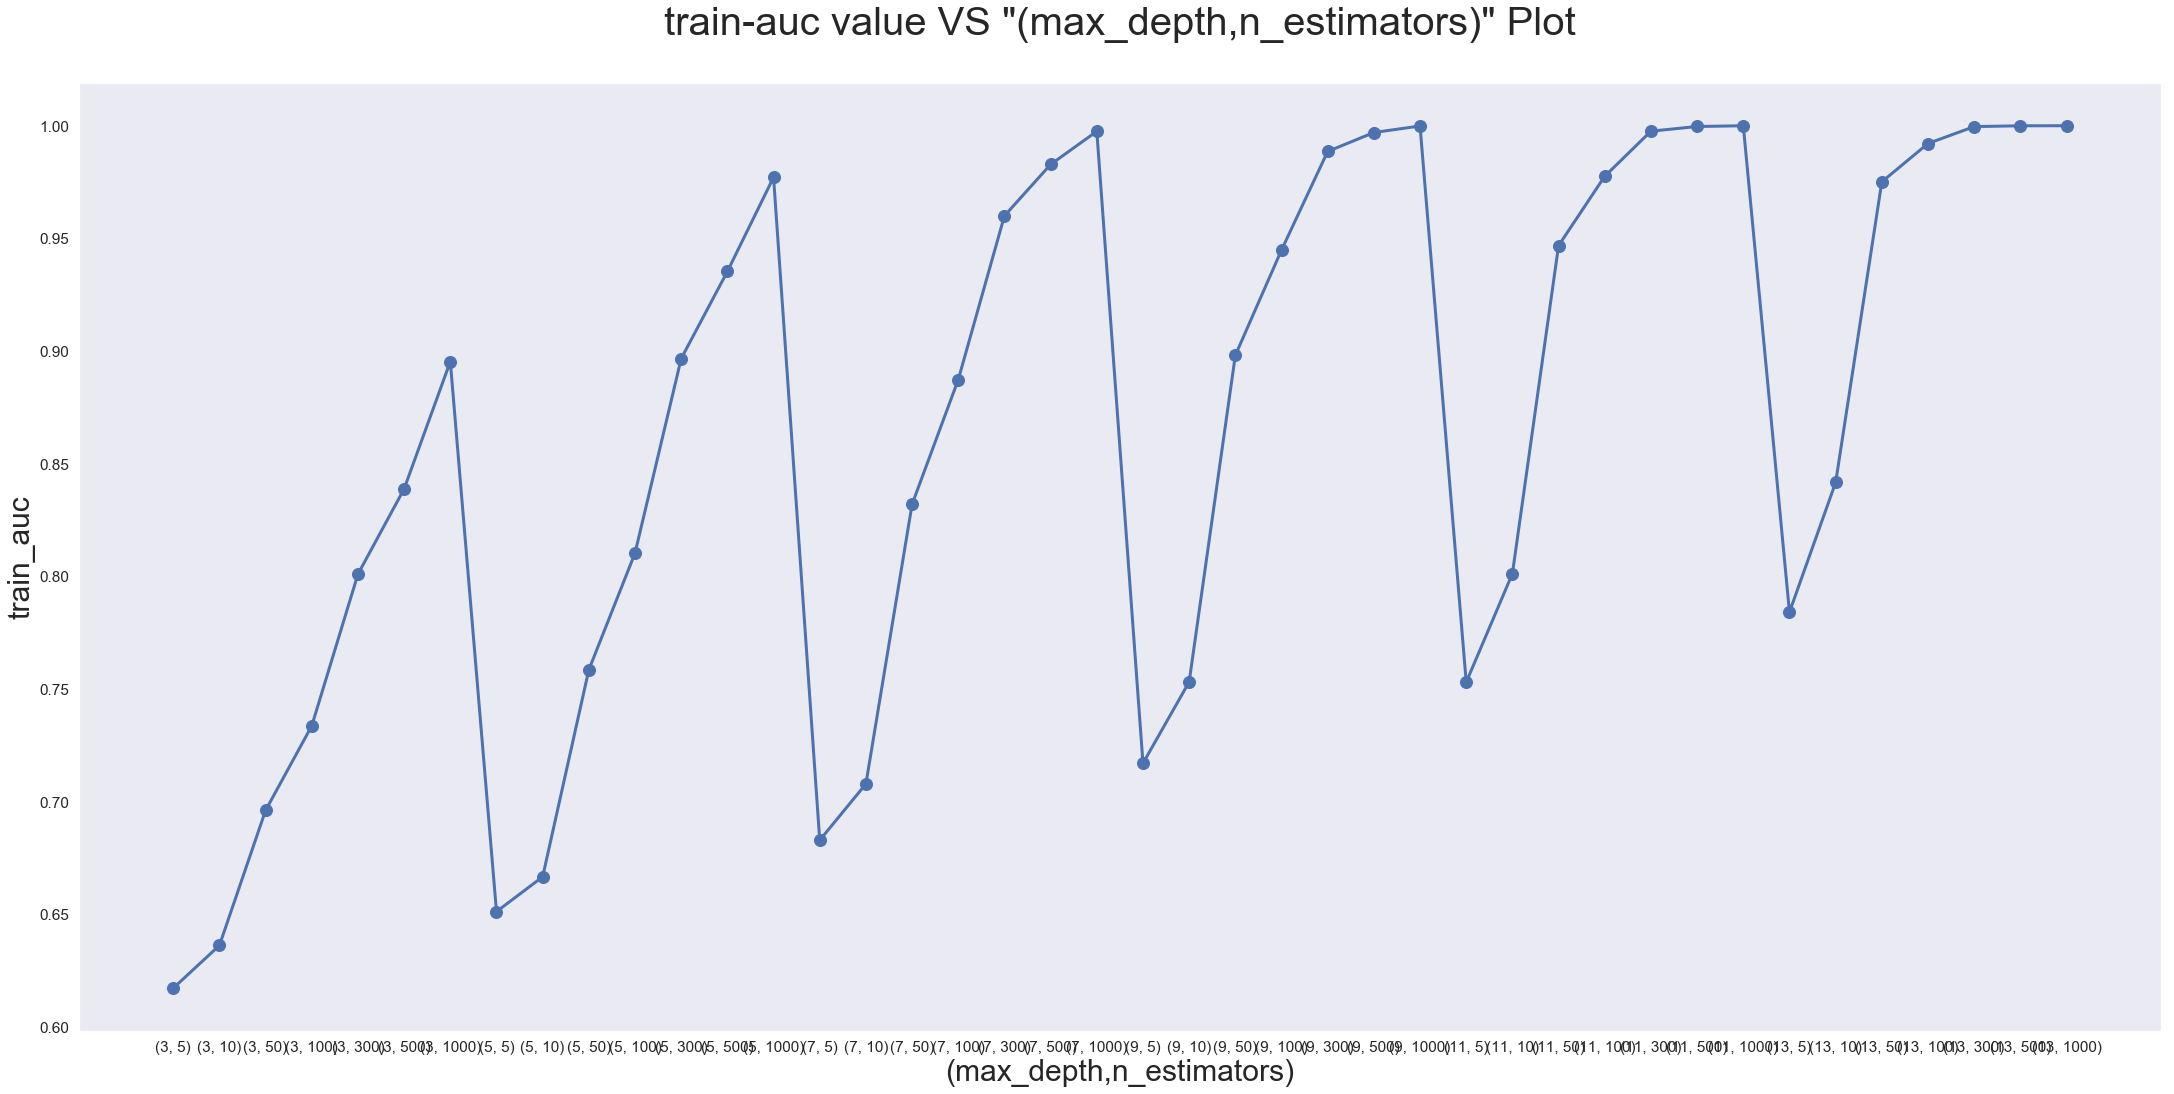

In [0]:
arr_depth=grid_tfidf.cv_results_['param_max_depth'] 
arr_estimator=grid_tfidf.cv_results_['param_n_estimators']
data = [] #  List of tuples(depth,estimators)
for i in range(arr_depth.shape[0]):
    data.append(str((arr_depth[i],arr_estimator[i])))
    
# plotting Cross-Validation Error vs tuples of (max_depth,n_estimators) graph  
plt.figure(figsize=(30,15))
plt.plot(data, train_auc,linewidth=3, marker='o',markersize=12)
plt.xlabel('(max_depth,n_estimators)',size=30)
plt.ylabel('train_auc',size=30)
plt.title('train-auc value VS "(max_depth,n_estimators)" Plot\n',size=40)
plt.tight_layout(pad=0.0)
plt.grid()
plt.show()

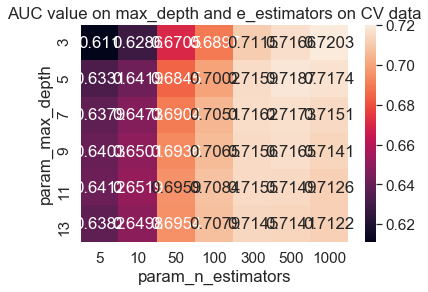

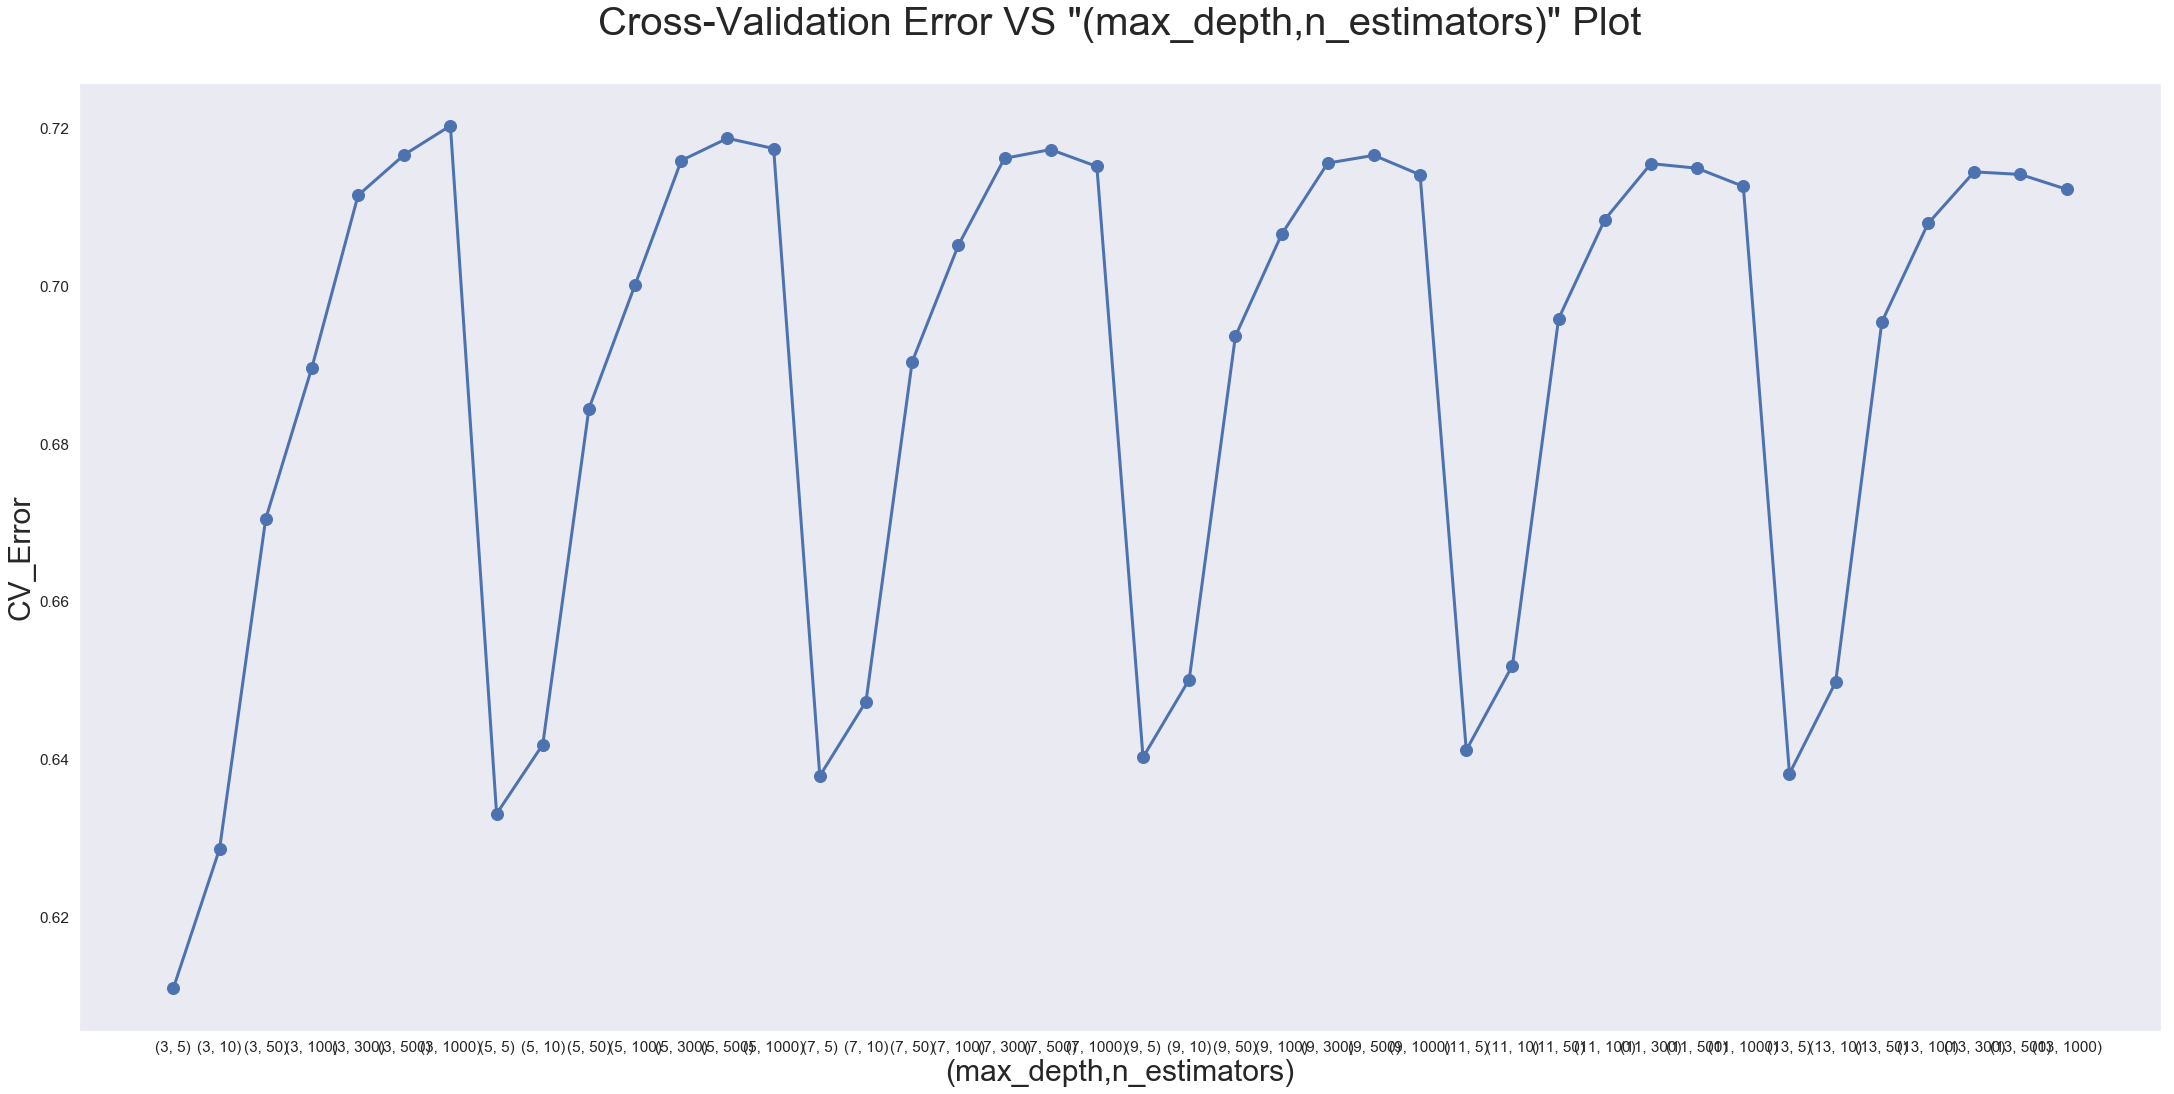

In [0]:
df_gridsearch = pd.DataFrame(grid_tfidf.cv_results_)
max_scores = df_gridsearch.groupby(['param_max_depth','param_n_estimators']).max()
max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g')
plt.title('AUC value on max_depth and e_estimators on CV data')
plt.show()


#plotting Cross-Validation Error vs tuples of (max_depth,n_estimators) graph  
plt.figure(figsize=(30,15))
plt.plot(data, cv_auc,linewidth=3, marker='o',markersize=12)
plt.xlabel('(max_depth,n_estimators)',size=30)
plt.ylabel('CV_Error',size=30)
plt.title('Cross-Validation Error VS "(max_depth,n_estimators)" Plot\n',size=40)
plt.tight_layout(pad=0.0)
plt.grid()
plt.show()

#### ROC plot

----------------------------------------------------


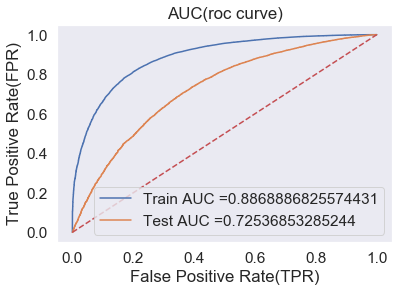

In [0]:
#ROC on test data
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier

gbdt = XGBClassifier(booster='gbtree',max_depth=depth_hyperparameter_tfidf_gbdt,n_estimators=n_estimators_hyperparameter_tfidf_gbdt,random_state=0)
gbdt.fit(x_train_tfidf,y_train)

print("----------------------------------------------------")
y_train_pred = gbdt.predict_proba(x_train_tfidf)[:,1]    
y_test_pred = gbdt.predict_proba(x_test_tfidf)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

tfidf_auc_train_gbdt = auc(train_fpr, train_tpr)
tfidf_auc_test_gbdt = auc(test_fpr, test_tpr)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'r--')
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC(roc curve)")
plt.grid()
plt.show()

#### Confusion matrix

In [0]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

the maximum value of tpr*(1-fpr) 0.6495750640830169 for threshold 0.815


TRAIN confusion matrix
[[ 9191  2354]
 [11950 52976]]


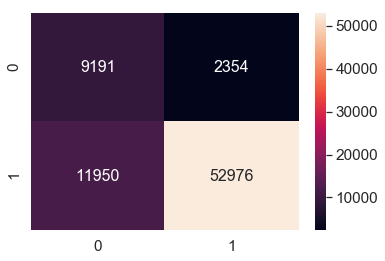

In [0]:
print("="*100)
print("TRAIN confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

Test confusion matrix
[[ 2818  2179]
 [ 6322 21455]]


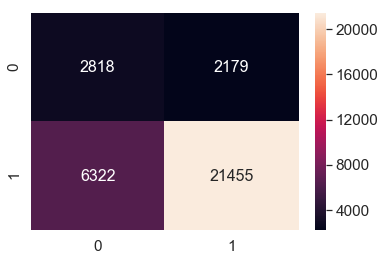

In [0]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))


conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.5.3 Applying XGBOOST on AVG W2V,<font color='red'> SET 3</font>

#### vectorize essay and title ,<font color='red'> SET 3</font>

In [0]:
# Please write all the code with proper documentation

In [0]:

'''# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!
# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)'''

In [139]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [140]:
# Using Pretrained Models: AVG W2V on `essay`
#_______________________________________________

# -----average Word2Vec on train
# compute average word2vec for each review.
avg_w2v_vectors_essays_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essays_train.append(vector)

print(len(avg_w2v_vectors_essays_train))
print(len(avg_w2v_vectors_essays_train[0]))

100%|██████████████████████████████████| 41999/41999 [00:13<00:00, 3035.09it/s]


41999
300


In [141]:
# -----average Word2Vec on test
# compute average word2vec for each review.
avg_w2v_vectors_essays_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essays_test.append(vector)

print(len(avg_w2v_vectors_essays_test))
print(len(avg_w2v_vectors_essays_test[0]))

100%|██████████████████████████████████| 18000/18000 [00:05<00:00, 3004.84it/s]


18000
300


In [142]:
# Using Pretrained Models: AVG W2V on `project_title`
#_____________________________________________________

# ------average Word2Vec on train
# compute average word2vec for each review.
avg_w2v_vectors_project_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_project_title_train.append(vector)

print(len(avg_w2v_vectors_project_title_train))
print(len(avg_w2v_vectors_project_title_train[0]))

100%|█████████████████████████████████| 41999/41999 [00:00<00:00, 55331.50it/s]


41999
300


In [143]:
# ------average Word2Vec on test
# compute average word2vec for each review.
avg_w2v_vectors_project_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_project_title_test.append(vector)

print(len(avg_w2v_vectors_project_title_test))
print(len(avg_w2v_vectors_project_title_test[0]))

100%|█████████████████████████████████| 18000/18000 [00:00<00:00, 52782.92it/s]


18000
300


#### merge dataset ,<font color='red'> SET 3</font>

In [144]:
#https://stackoverflow.com/questions/43977463/valueerror-could-not-broadcast-input-array-from-shape-224-224-3-into-shape-2
#https://stackoverflow.com/questions/5951135/how-to-save-a-list-as-numpy-array-in-python
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)

x_train_AVGW2V = np.hstack((x_train_ohe, avg_w2v_vectors_essays_train, avg_w2v_vectors_project_title_train))

x_test_AVGW2V = np.hstack((x_test_ohe, avg_w2v_vectors_essays_test, avg_w2v_vectors_project_title_test))

print(x_train_AVGW2V.shape)

print(x_test_AVGW2V.shape)

(41999, 621)
(18000, 621)


#### GridsearchCV ,<font color='red'> SET 3</font>

In [0]:
%time
from sklearn.model_selection import GridSearchCV,TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc

print("***************Grid search cv perform on train dataset******************")

gbdt = XGBClassifier(booster='gbtree')#class_weight='balanced'?(why)
#params we need to try on classifier
param_grid = {'max_depth':[3,5,7,9,11,13],
              'n_estimators':[5, 10, 50, 100,300 ,500,1000]}
#ts_cv = TimeSeriesSplit(n_splits=10) #For time based splitting
grid_AVGW2V = GridSearchCV(gbdt,param_grid,cv=10,verbose=1,n_jobs=-1,scoring='roc_auc',return_train_score=True)
grid_AVGW2V.fit(x_train_AVGW2V,y_train)

n_estimators_hyperparameter_AVGW2V_gbdt=grid_AVGW2V.best_params_['n_estimators']
depth_hyperparameter_AVGW2V_gbdt=grid_AVGW2V.best_params_['max_depth']

#savetofile(gsv,"Log Reg/gsv_uni")
print("Best HyperParameter: ",grid_AVGW2V.best_params_)


train_auc= grid_AVGW2V.cv_results_['mean_train_score']
train_auc_std= grid_AVGW2V.cv_results_['std_train_score']
cv_auc = grid_AVGW2V.cv_results_['mean_test_score'] 
cv_auc_std= grid_AVGW2V.cv_results_['std_test_score']

print("----------------------------------------------------")

Wall time: 0 ns
***************Grid search cv perform on train dataset******************
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 58.9min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 1065.8min


In [0]:
grid_AVGW2V.best_params_

{'max_depth': 13, 'n_estimators': 1000}

In [0]:
train_auc

array([0.63828862, 0.65506413, 0.7078283 , 0.73728296, 0.80427671,
       0.84696473, 0.91292691, 0.67584495, 0.69927812, 0.78604877,
       0.84809098, 0.95204519, 0.98516418, 0.99957836, 0.7302335 ,
       0.77348469, 0.91714496, 0.97285765, 0.99965999, 0.99999597,
       0.9999999 , 0.80141649, 0.86676265, 0.99466041, 0.9998185 ,
       0.99999987, 0.9999999 , 0.9999999 , 0.86605131, 0.93869677,
       0.99998124, 0.99999972, 0.9999999 , 0.9999999 , 0.9999999 ,
       0.91075269, 0.9737698 , 0.99999968, 0.9999999 , 0.9999999 ,
       0.9999999 , 0.9999999 ])

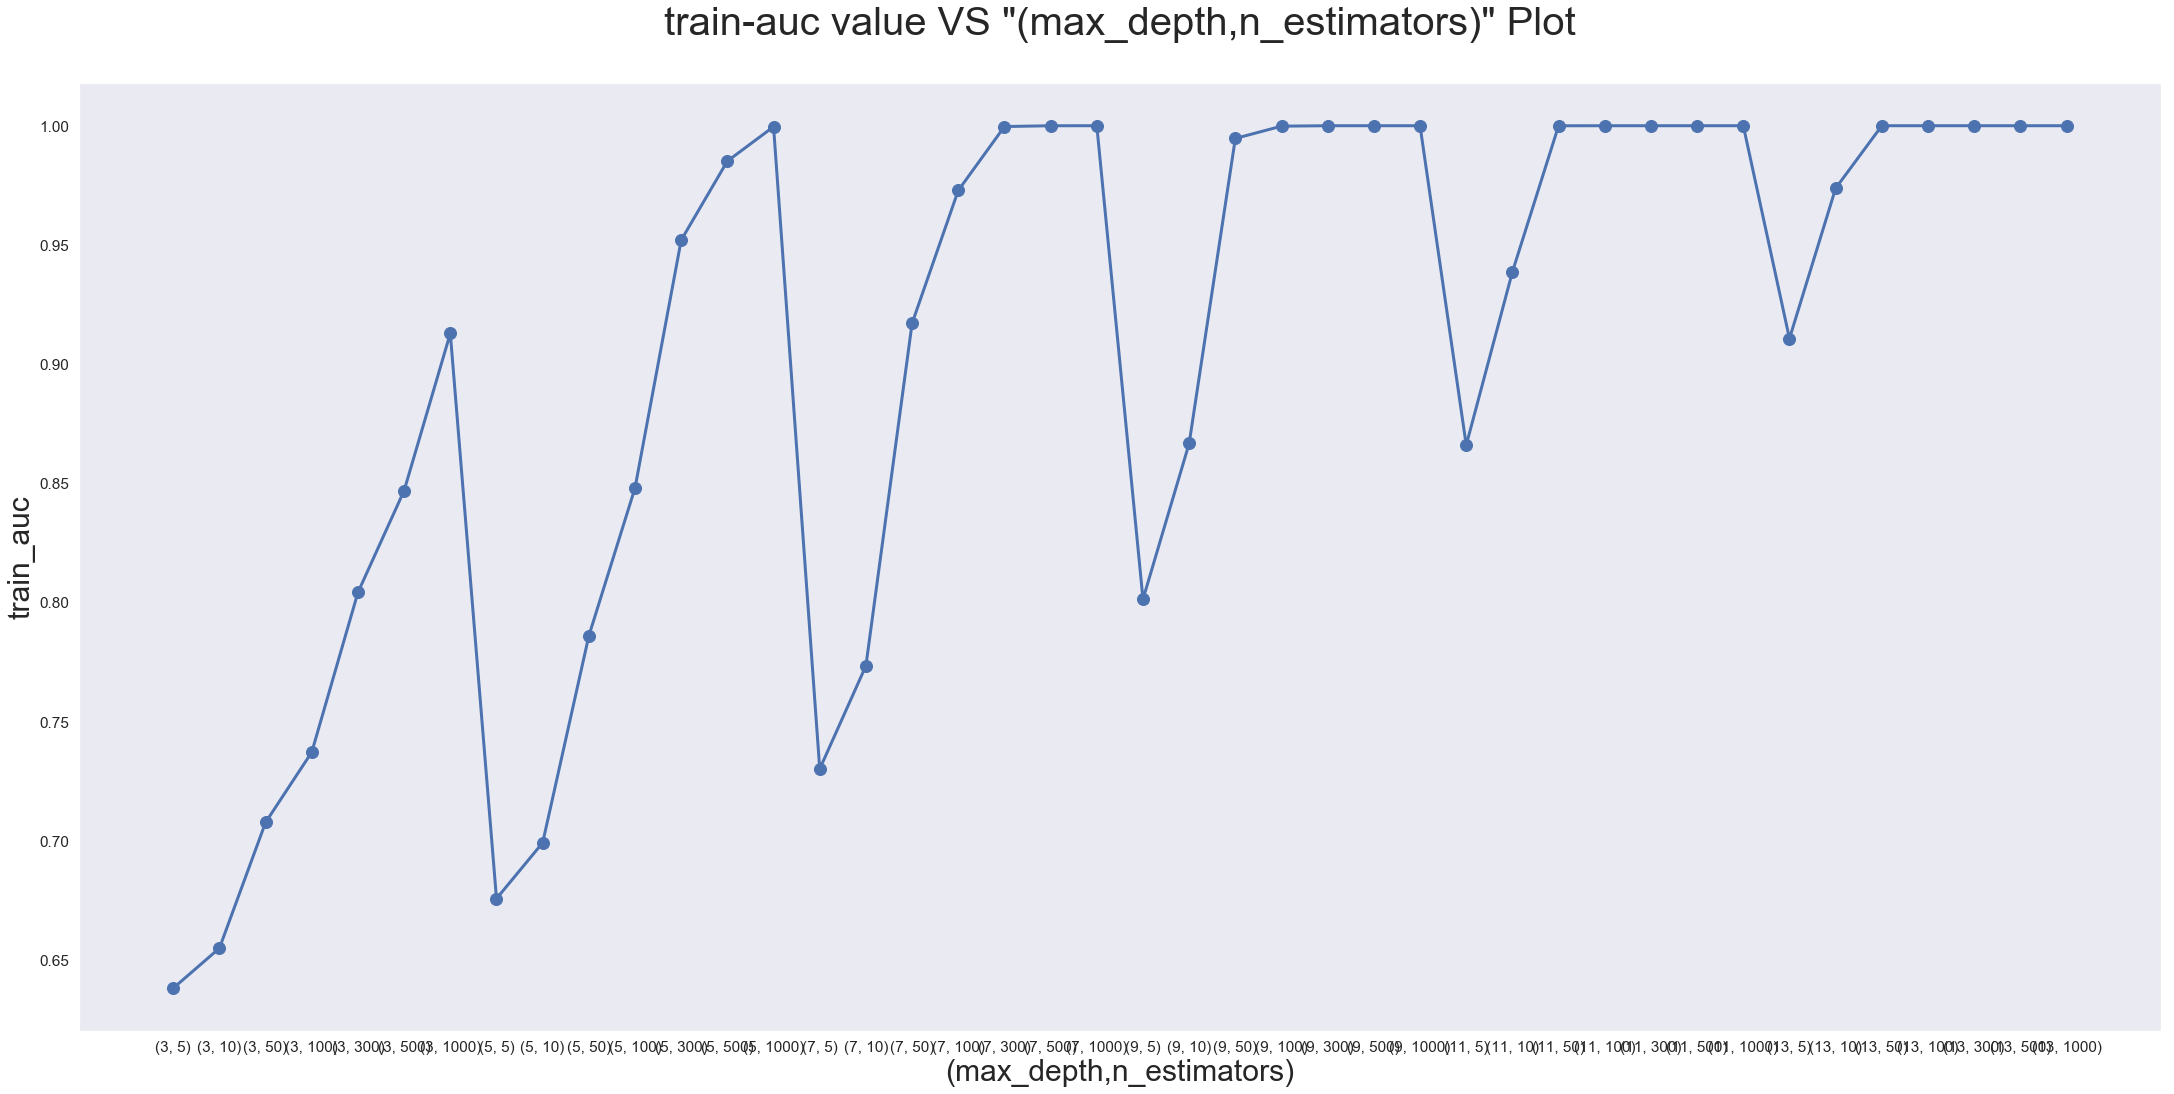

In [0]:
arr_depth=grid_AVGW2V.cv_results_['param_max_depth'] 
arr_estimator=grid_AVGW2V.cv_results_['param_n_estimators']
data = [] #  List of tuples(depth,estimators)
for i in range(arr_depth.shape[0]):
    data.append(str((arr_depth[i],arr_estimator[i])))
    
# plotting Cross-Validation Error vs tuples of (max_depth,n_estimators) graph  
plt.figure(figsize=(30,15))
plt.plot(data, train_auc,linewidth=3, marker='o',markersize=12)
plt.xlabel('(max_depth,n_estimators)',size=30)
plt.ylabel('train_auc',size=30)
plt.title('train-auc value VS "(max_depth,n_estimators)" Plot\n',size=40)
plt.tight_layout(pad=0.0)
plt.grid()
plt.show()

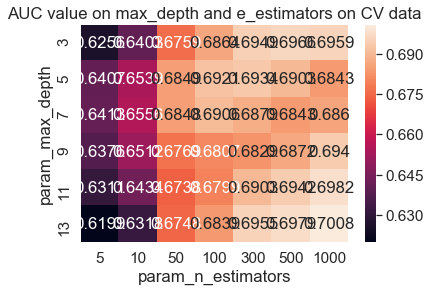

In [0]:
df_gridsearch = pd.DataFrame(grid_AVGW2V.cv_results_)
max_scores = df_gridsearch.groupby(['param_max_depth','param_n_estimators']).max()
max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g')
plt.title('AUC value on max_depth and e_estimators on CV data')
plt.show()

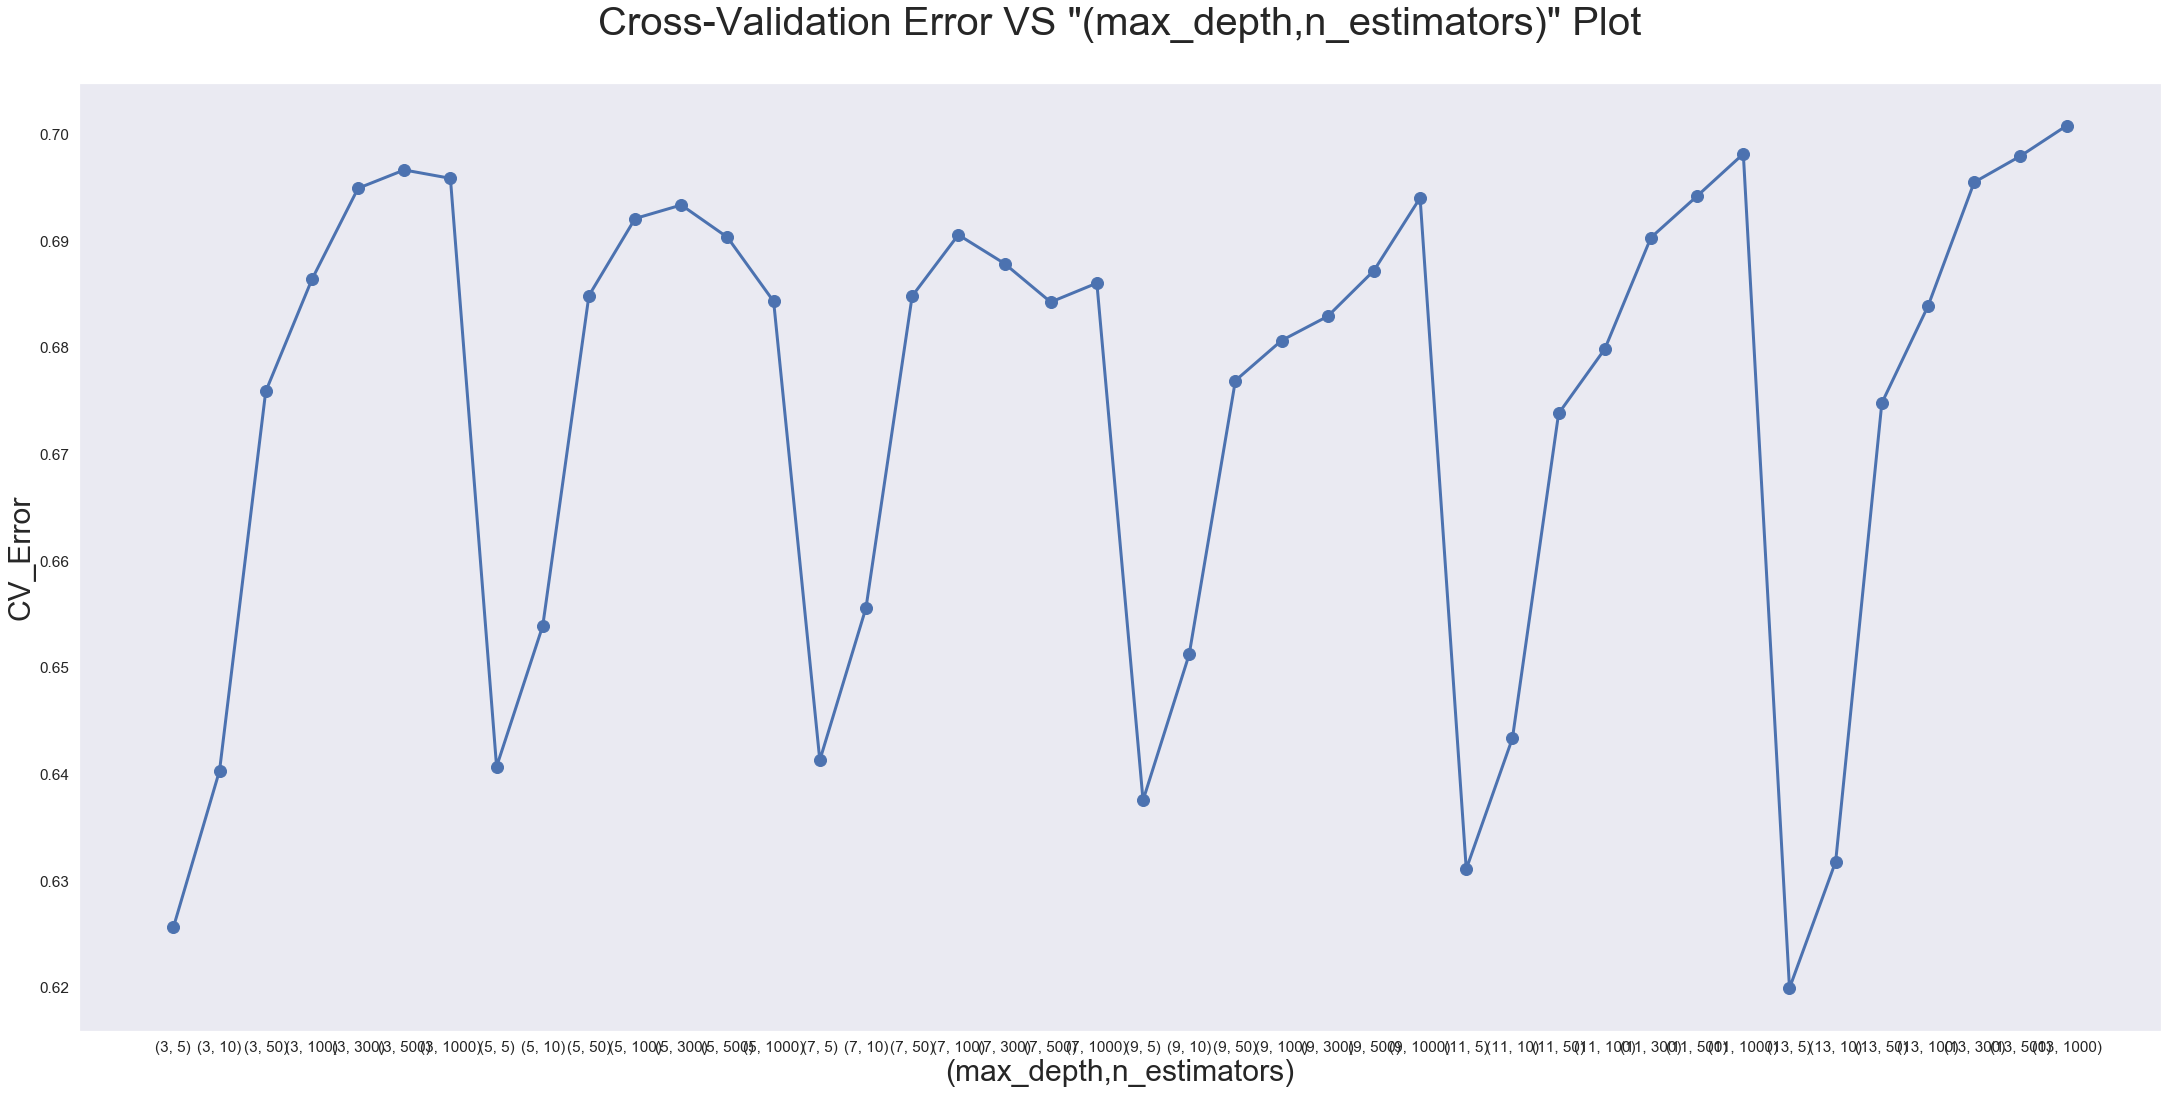

In [0]:
#plotting Cross-Validation Error vs tuples of (max_depth,n_estimators) graph  
plt.figure(figsize=(30,15))
plt.plot(data, cv_auc,linewidth=3, marker='o',markersize=12)
plt.xlabel('(max_depth,n_estimators)',size=30)
plt.ylabel('CV_Error',size=30)
plt.title('Cross-Validation Error VS "(max_depth,n_estimators)" Plot\n',size=40)
plt.tight_layout(pad=0.0)
plt.grid()
plt.show()

#### ROC of test and train ,<font color='red'> SET 3</font>

----------------------------------------------------


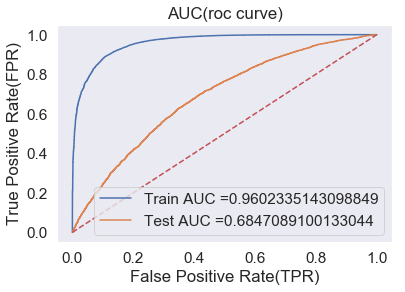

In [166]:
#ROC on test data
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

from sklearn.metrics import roc_curve, auc
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

gbdt = XGBClassifier(booster='gbtree',max_depth=depth_hyperparameter_AVGW2V_gbdt,n_estimators=n_estimators_hyperparameter_AVGW2V_gbdt,random_state=0)
gbdt.fit(x_train_AVGW2V,y_train)

print("----------------------------------------------------")
y_train_pred = gbdt.predict_proba(x_train_AVGW2V)[:,1]    
y_test_pred = gbdt.predict_proba(x_test_AVGW2V)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

AVGW2V_auc_train_gbdt = auc(train_fpr, train_tpr)
AVGW2V_auc_test_gbdt = auc(test_fpr, test_tpr)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'r--')
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC(roc curve)")
plt.grid()
plt.show()

#### Confusion matrix ,<font color='red'> SET 3</font>

In [169]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


In [170]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

the maximum value of tpr*(1-fpr) 0.7933247363166565 for threshold 0.808


TRAIN confusion matrix
[[ 5625   686]
 [ 3923 31765]]


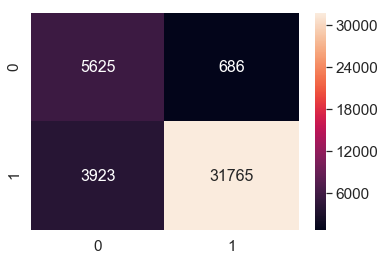

In [171]:
print("="*100)
print("TRAIN confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

Test confusion matrix
[[ 1224  1513]
 [ 3003 12260]]


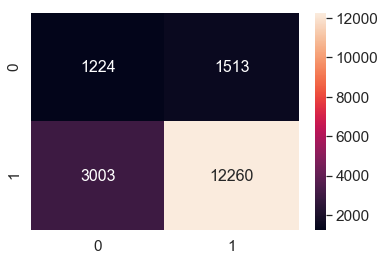

In [172]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))


conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.5.4 Applying XGBOOST on TFIDF W2V,<font color='red'> SET 4</font>

In [0]:
# Please write all the code with proper documentation

#### Vectorize essay and title ,<font color='red'> SET 4</font>

In [152]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(x_train['preprocessed_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


In [153]:
#Using Pretrained Models: TFIDFW weighted W2V on `essay
#___________________________________

# average Word2Vec---train
# compute average word2vec for each review.
tfidf_w2v_vectors_essays_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essays_train.append(vector)

print(len(tfidf_w2v_vectors_essays_train))
print(len(tfidf_w2v_vectors_essays_train[0]))

100%|███████████████████████████████████| 41999/41999 [01:37<00:00, 430.26it/s]


41999
300


In [154]:
# average Word2Vec---test
# compute average word2vec for each review.
tfidf_w2v_vectors_essays_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essays_test.append(vector)

print(len(tfidf_w2v_vectors_essays_test))
print(len(tfidf_w2v_vectors_essays_test[0]))

100%|███████████████████████████████████| 18000/18000 [00:40<00:00, 449.08it/s]


18000
300


In [155]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(x_train['preprocessed_project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [156]:
#Using Pretrained Models: TFIDFW weighted W2V on "preprocessed_project_title"
#___________________________________________
# average Word2Vec--train
# compute average word2vec for each review.
tfidf_w2v_vectors_project_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_project_title_train.append(vector)

print(len(tfidf_w2v_vectors_project_title_train))
print(len(tfidf_w2v_vectors_project_title_train[0]))

100%|█████████████████████████████████| 41999/41999 [00:01<00:00, 27024.83it/s]


41999
300


In [157]:
# average Word2Vec--test
# compute average word2vec for each review.
tfidf_w2v_vectors_project_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_project_title_test.append(vector)

print(len(tfidf_w2v_vectors_project_title_test))
print(len(tfidf_w2v_vectors_project_title_test[0]))

100%|█████████████████████████████████| 18000/18000 [00:00<00:00, 27479.35it/s]


18000
300


#### merge dataset ,<font color='red'> SET 4</font>

In [158]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_TFIDFW2V = np.hstack((x_train_ohe, tfidf_w2v_vectors_essays_train, tfidf_w2v_vectors_project_title_train))

x_test_TFIDFW2V = np.hstack((x_test_ohe, tfidf_w2v_vectors_essays_test, tfidf_w2v_vectors_project_title_test))

print(x_train_TFIDFW2V.shape)

print(x_test_TFIDFW2V.shape)

(41999, 621)
(18000, 621)


#### GridsearchCV ,<font color='red'> SET 4</font>

In [0]:
%time
from sklearn.model_selection import GridSearchCV,TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc

print("***************Grid search cv perform on train dataset******************")

gbdt = XGBClassifier(booster='gbtree')#class_weight='balanced'?(why)
#params we need to try on classifier7
param_grid = {'max_depth':[3,5,7,9,11,13],
              'n_estimators':[5, 10, 50, 100,300 ,500,1000]}
#ts_cv = TimeSeriesSplit(n_splits=10) #For time based splitting
grid_TFIDFW2V = GridSearchCV(gbdt,param_grid,cv=10,verbose=1,n_jobs=-1,scoring='roc_auc',pre_dispatch=2,return_train_score=True)
grid_TFIDFW2V.fit(x_train_TFIDFW2V,y_train)

n_estimators_hyperparameter_TFIDFW2V_gbdt=grid_TFIDFW2V.best_params_['n_estimators']
depth_hyperparameter_TFIDFW2V_gbdt=grid_TFIDFW2V.best_params_['max_depth']

#savetofile(gsv,"Log Reg/gsv_uni")
print("Best HyperParameter: ",grid_TFIDFW2V.best_params_)



train_auc= grid_TFIDFW2V.cv_results_['mean_train_score']
#train_auc_std= grid_TFIDFW2V.cv_results_['std_train_score']
cv_auc = grid_TFIDFW2V.cv_results_['mean_test_score'] 
#cv_auc_std= grid_TFIDFW2V.cv_results_['std_test_score']

print("----------------------------------------------------")

Wall time: 0 ns
***************Grid search cv perform on train dataset******************
Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed: 59.3min
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed: 663.4min


#### Plot

In [0]:
train_auc

array([0.5765348, 0.6365886, 0.6550641, 0.7078283, 0.7372827, 0.8042767,
       0.8469647, 0.8129269, 0.675845 , 0.6992781, 0.7860487, 0.918091 ,
       0.8520452, 0.9886642, 0.9999684, 0.730233 , 0.7734957, 0.917145 ,
       0.972853 , 0.999305 , 0.999393 , 0.9945999, 0.8015065, 0.8604763,
       0.9904604, 0.9994385, 0.9929999, 0.9994999, 0.9995999, 0.8664013,
       0.9384068, 0.9999502, 0.9995097, 0.9799999, 0.9899999, 0.9889999,
       0.9187527, 0.9773698, 0.9934997, 0.9945999, 0.9996799, 0.9999956])

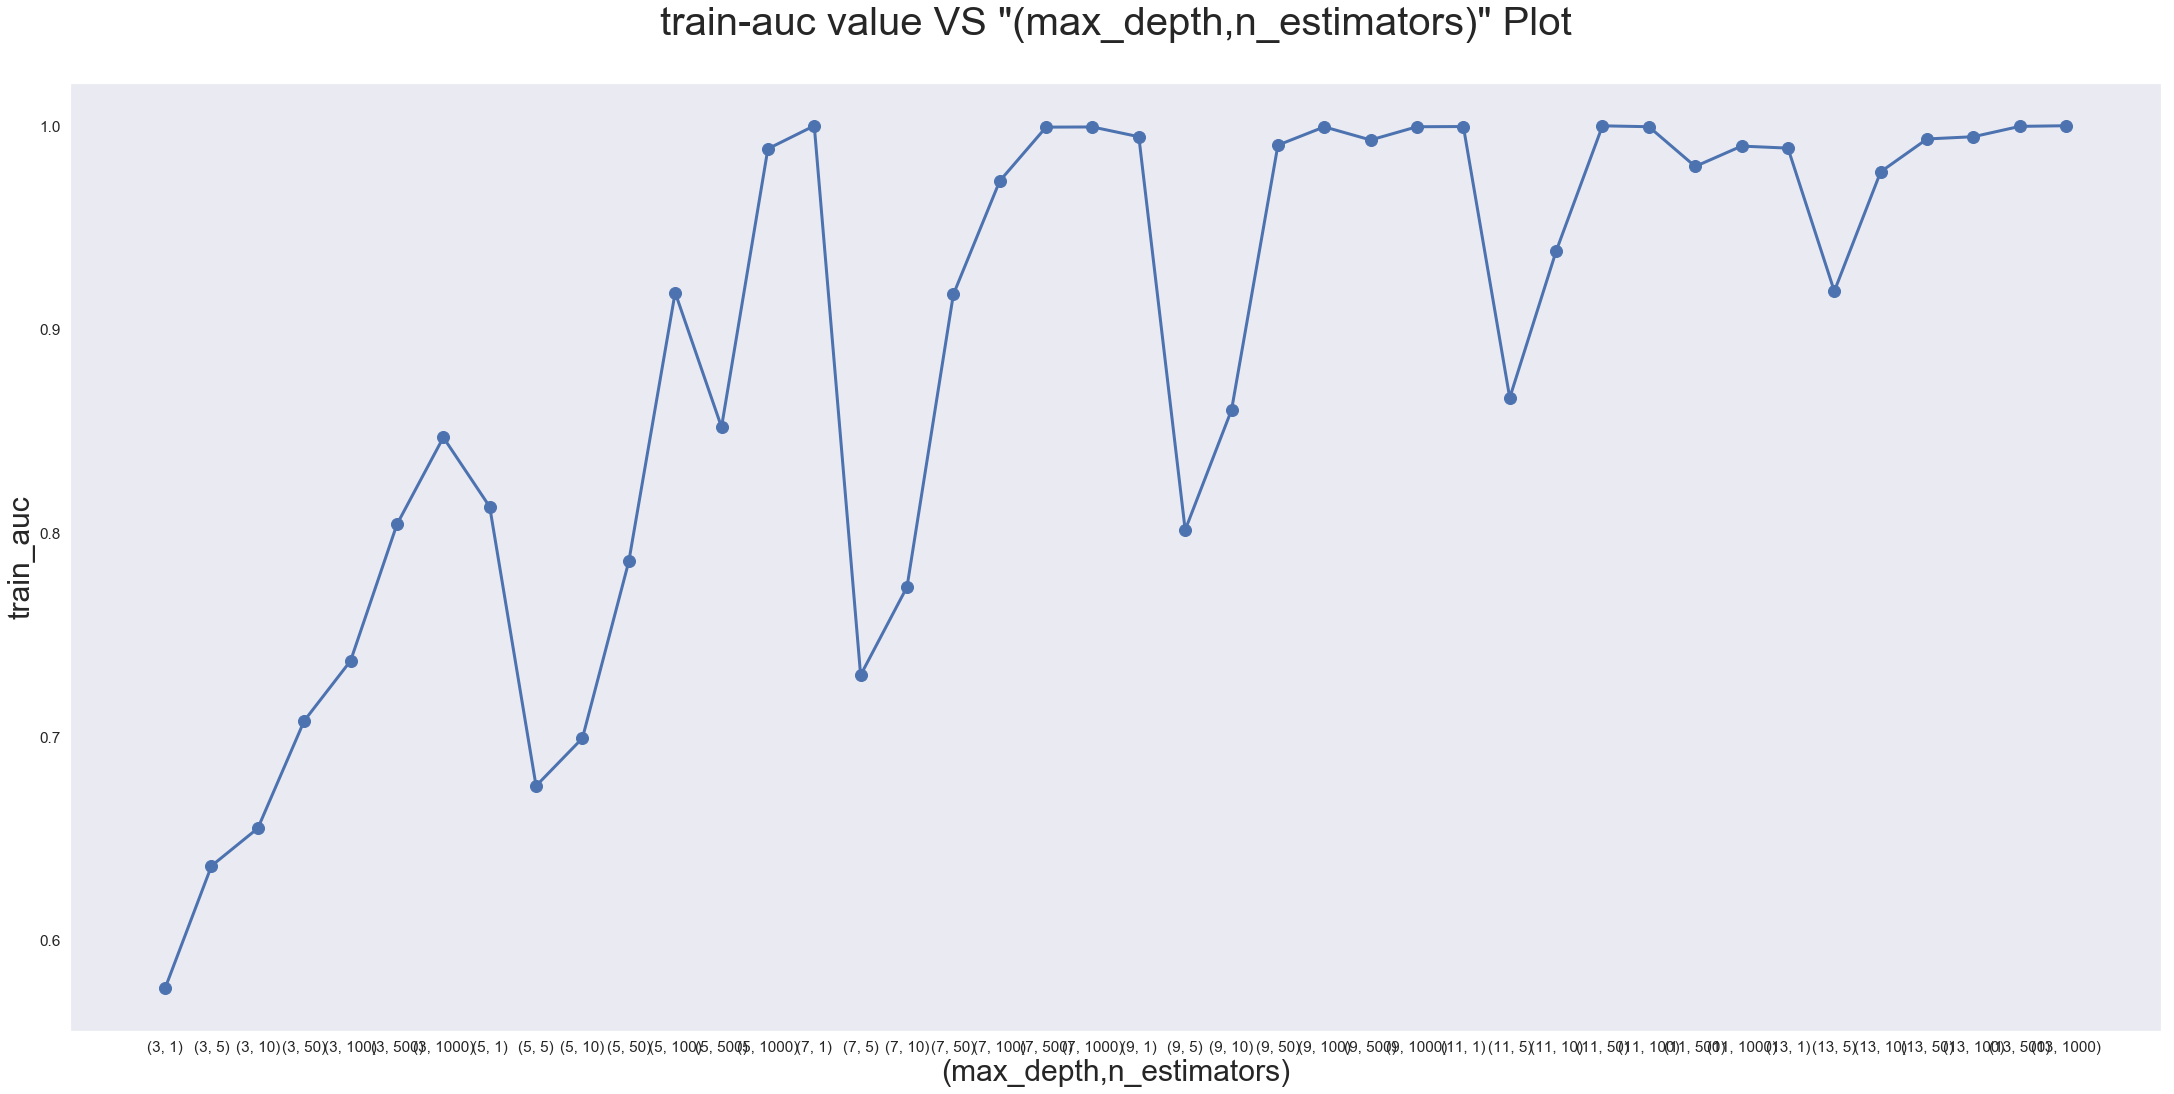

In [0]:
arr_depth=grid_TFIDFW2V.cv_results_['param_max_depth'] 
arr_estimator=grid_TFIDFW2V.cv_results_['param_n_estimators']
data = [] #  List of tuples(depth,estimators)
for i in range(arr_depth.shape[0]):
    data.append(str((arr_depth[i],arr_estimator[i])))
    
# plotting Cross-Validation Error vs tuples of (max_depth,n_estimators) graph  
plt.figure(figsize=(30,15))
plt.plot(data, train_auc,linewidth=3, marker='o',markersize=12)
plt.xlabel('(max_depth,n_estimators)',size=30)
plt.ylabel('train_auc',size=30)
plt.title('train-auc value VS "(max_depth,n_estimators)" Plot\n',size=40)
plt.tight_layout(pad=0.0)
plt.grid()
plt.show()

In [195]:
n_estimators_hyperparameter_TFIDFW2V_gbdt

1000

In [196]:
depth_hyperparameter_TFIDFW2V_gbdt

3

#### ROC on test data

----------------------------------------------------


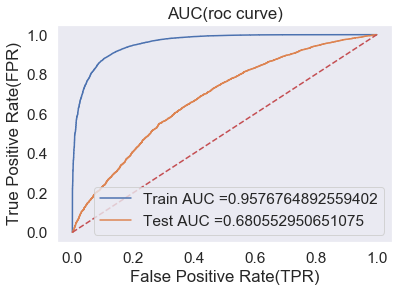

In [174]:
#ROC on test data
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier

gbdt = XGBClassifier(booster='gbtree',max_depth=depth_hyperparameter_TFIDFW2V_gbdt,n_estimators=n_estimators_hyperparameter_TFIDFW2V_gbdt,random_state=0)
gbdt.fit(x_train_TFIDFW2V,y_train)

print("----------------------------------------------------")
y_train_pred = gbdt.predict_proba(x_train_TFIDFW2V)[:,1]    
y_test_pred = gbdt.predict_proba(x_test_TFIDFW2V)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

TFIDFW2V_auc_train_gbdt = auc(train_fpr, train_tpr)
TFIDFW2V_auc_test_gbdt = auc(test_fpr, test_tpr)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'r--')
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC(roc curve)")
plt.grid()
plt.show()

#### Confusion matrix

In [175]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


In [176]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

the maximum value of tpr*(1-fpr) 0.7879060290861795 for threshold 0.807


TRAIN confusion matrix
[[ 5649   662]
 [ 4274 31414]]


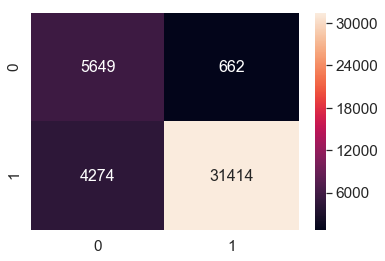

In [177]:
print("="*100)
print("TRAIN confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

Test confusion matrix
[[ 1261  1476]
 [ 3220 12043]]


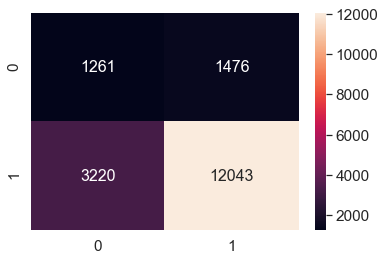

In [178]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))


conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

## <h1>3. Conclusion</h1>

In [0]:
# Please compare all your models using Prettytable library

In [0]:
#!pip install prettytable

##### Random forest

In [201]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model","Hyper parameter_max_dpth", "Hyper parameter_min_split","AUC_Train", "AUC_test"]
x.add_row(["BOW", "XGBoost", depth_hyperparameter_bow_RF,n_estimators_hyperparameter_bow_RF, BOW_auc_train,BOW_auc_test])
x.add_row(["TFIDF", "XGBoost",depth_hyperparameter_tfidf_RF,n_estimators_hyperparameter_tfidf_RF, tfidf_auc_train,tfidf_auc_test])
x.add_row(["AVG W2V", "XGBoost", depth_hyperparameter_AVGW2V_RF,n_estimators_hyperparameter_AVGW2V_RF, AVGW2V_auc_train,AVGW2V_auc_test])
x.add_row(["TFIDF AVG W2V", "XGBoost", depth_hyperparameter_TFIDFW2V_RF,n_estimators_hyperparameter_TFIDFW2V_RF, TFIDFW2V_auc_train,TFIDFW2V_auc_test])
print(x)

+---------------+---------+--------------------------+---------------------------+---------------+---------------+
|   Vectorizer  |  Model  | Hyper parameter_max_dpth | Hyper parameter_min_split |   AUC_Train   |    AUC_test   |
+---------------+---------+--------------------------+---------------------------+---------------+---------------+
|      BOW      | XGBoost |           500            |            1000           |   0.8141815   |   0.67408262  |
|     TFIDF     | XGBoost |            10            |            1000           |   0.85435371  |  0.696338197  |
|    AVG W2V    | XGBoost |            10            |            1000           | 0.74014415761 |  0.6770301753 |
| TFIDF AVG W2V | XGBoost |            10            |            1000           | 0.73186740262 | 0.67759696639 |
+---------------+---------+--------------------------+---------------------------+---------------+---------------+


Observation:

1)BOW, TFIDF have little high depth 500 and split remain constant 1000 for all model and it ha been seen that AUC value of train is very hight than AUC of test dataset. model is seen as little overfitting.

2) Hyper parameter prefer high value for model with AVG W2V vectorizer. 

3)AUC value of training, test have quite gap which show that model in all case is little bit overfit.

##### XGBoost

In [202]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model","Hyper parameter_max_dpth", "Hyper parameter_min_split","AUC_Train", "AUC_test"]
x.add_row(["BOW", "XGBoost", depth_hyperparameter_bow_gbdt,n_estimators_hyperparameter_bow_gbdt, BOW_auc_train_gbdt,BOW_auc_test_gbdt])
x.add_row(["TFIDF", "XGBoost",depth_hyperparameter_tfidf_gbdt,n_estimators_hyperparameter_tfidf_gbdt, tfidf_auc_train_gbdt,tfidf_auc_test_gbdt])
x.add_row(["AVG W2V", "XGBoost", depth_hyperparameter_AVGW2V_gbdt,n_estimators_hyperparameter_AVGW2V_gbdt, AVGW2V_auc_train_gbdt,AVGW2V_auc_test_gbdt])
x.add_row(["TFIDF AVG W2V", "XGBoost", depth_hyperparameter_TFIDFW2V_gbdt,n_estimators_hyperparameter_TFIDFW2V_gbdt, TFIDFW2V_auc_train_gbdt,TFIDFW2V_auc_test_gbdt])
print(x)

+---------------+---------+--------------------------+---------------------------+--------------------+--------------------+
|   Vectorizer  |  Model  | Hyper parameter_max_dpth | Hyper parameter_min_split |     AUC_Train      |      AUC_test      |
+---------------+---------+--------------------------+---------------------------+--------------------+--------------------+
|      BOW      | XGBoost |            5             |            500            | 0.8963626885240853 | 0.7250291349162379 |
|     TFIDF     | XGBoost |            3             |            1000           | 0.8868886825574431 |  0.72536853285244  |
|    AVG W2V    | XGBoost |            3             |            1000           |  0.96023351430988  |  0.6847089100133   |
| TFIDF AVG W2V | XGBoost |            3             |            1000           |    0.957676489     |   0.680552950651   |
+---------------+---------+--------------------------+---------------------------+--------------------+--------------------+


Observation:

1)all model have low depth except AVG W2V and split remain constant (1000,500) for all model and it ha been seen that AUC value of train is very hight than AUC of test dataset. model is seen as little overfitting.

2) Hyper parameter prefer high value for model with AVG W2V vectorizer.

3)AUC value of training, test have quite gap which show that model in all case is little bit overfit.